# Curso de Manejo de Datos Faltantes: Detección y Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=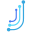)](https://jvelezmagic.com/)

![Curso de Exploración de Valores Faltantes para Data Science](logo-curso.jpeg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib missingno numpy pandas pyreadr seaborn session-info upsetplot
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [118]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

##  ¿Por qué explorar y lidiar con valores faltantes?

- Ignorar valores faltantes puede introducir sesgos en los análisis y modelos que se construyan
- Multiples de los algoritmos utilizados van a fallar cuando existan valores faltantes
- Aun con una muestra significativa y sin valores faltantes es insuficiente para emitir juicios, esto aumenta cuando no existen los valores

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [119]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operaciones con valores faltantes

- En python los valores nulos están representados por **None**, este no puede ser utilizados para realizar operaciones aritméticas pero si comparaciones booleanas de tipo **(or, and, ==, entre otros)**.
- En numpy se representan los valores faltantes con la expresión **np.nan**, esta permite realizar operaciones aritméticas ya que es de tipo _float_, también se pueden utilizar los None pero va tener los mismos inconvenientes que al sólo utilizar python.
- En pandas los valores faltantes se pueden representar de multiples formas como nan, NA, None

### Python

In [91]:
print(
    None or True,
    None and True,
    None == True,
    None != True,
    None is None,
    type(None),
    sep= '\n' 
    # None+1
)

True
None
False
True
True
<class 'NoneType'>


### NumPy

In [92]:
print(
    np.nan or True,
    np.nan or False,
    np.nan is np.nan,
    np.nan == np.nan,
    np.nan/2,
    np.nan*7,
    type(np.nan),
    np.isnan(np.nan),
    sep= '\n'  
    
)

nan
nan
True
False
nan
nan
<class 'float'>
True


### Pandas

In [93]:
test_missing_df = pd.DataFrame.from_dict(
    data= dict(
        x=[0,1,np.nan,np.nan,None],
        y=[0,1,pd.NA,np.nan,None]
    )
)
test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [94]:
test_missing_df.isnull() #Sirven para lo mismo la dos funciones
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [95]:
test_missing_df.x.isnull() # Se filtra por columnas si se desea

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [96]:
pd.Series([1,np.nan])

0    1.0
1    NaN
dtype: float64

In [97]:
pd.Series([pd.to_datetime('2023-06-06'),np.nan])

0   2023-06-06
1          NaT
dtype: datetime64[ns]

In [98]:
pd.Series([-1,np.nan]).isnull()

0    False
1     True
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [13]:
pima_indians_diabetes= "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [53]:
!curl { pima_indians_diabetes } > pima-indians-diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23279  100 23279    0     0  21654      0  0:00:01  0:00:01 --:--:-- 21796


In [4]:
diabetes_df = pd.read_csv('./data/pima-indians-diabetes.csv',
                          sep=',',
                          names= [
                              'pregnacies',
                              'glucose',
                              'blood_plessure',
                              'skin_thickness',
                              'insulin',
                              'bmi',
                              'diabetes_pedigree_function',
                              'age',
                              'outcome'
                          ])
diabetes_df

,pregnacies,glucose,blood_plessure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [5]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [6]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !curl { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

curl: (6) Could not resolve host: .


curl: (6) Could not resolve host: .
curl: (6) Could not resolve host: .


dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### Incluir conjuntos de datos en nuestro ambiente local

In [7]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga

In [8]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape # Dimensiones de los datasets en (#filas, #columnas)

((736, 8), (37700, 9), (245, 34), (768, 9))

In [9]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

**Nota: cuando existen variables que son numéricas pero están codificadas como object o category, se pueden convertir unicamente a float64 ya que este admite también valores faltantes**

In [10]:
riskfactors_df['weight_lbs']= riskfactors_df['weight_lbs'].astype('float64')
riskfactors_df['height_inch']= riskfactors_df['height_inch'].astype('float64')

In [11]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    float64 
 4   height_inch       243 non-null    float64 
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Tabulación de valores faltantes

In [12]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [13]:
riskfactors_df.shape

(245, 34)

#### Número total de valores completos (sin observaciones faltantes)

In [14]:
riskfactors_df.missing.number_complete()

7144

#### Número total de valores faltantes

In [15]:
riskfactors_df.missing.number_missing()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [16]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


###### Tabulación del resumen por variable

In [17]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [18]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


###### Tabulación del resumen por caso

In [19]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes
 Aqui se representa la información en intervalos dados por **span_every** a la variable seleccionada. Allí se muestra cuantos variables nulos son hallados por tramo.

In [20]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable= 'weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

Aqui se representan cada cuanto aparecen los valores nulos si se hace un muestreo en orden de los valores de la variable

In [21]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable= 'weight_lbs'
        
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

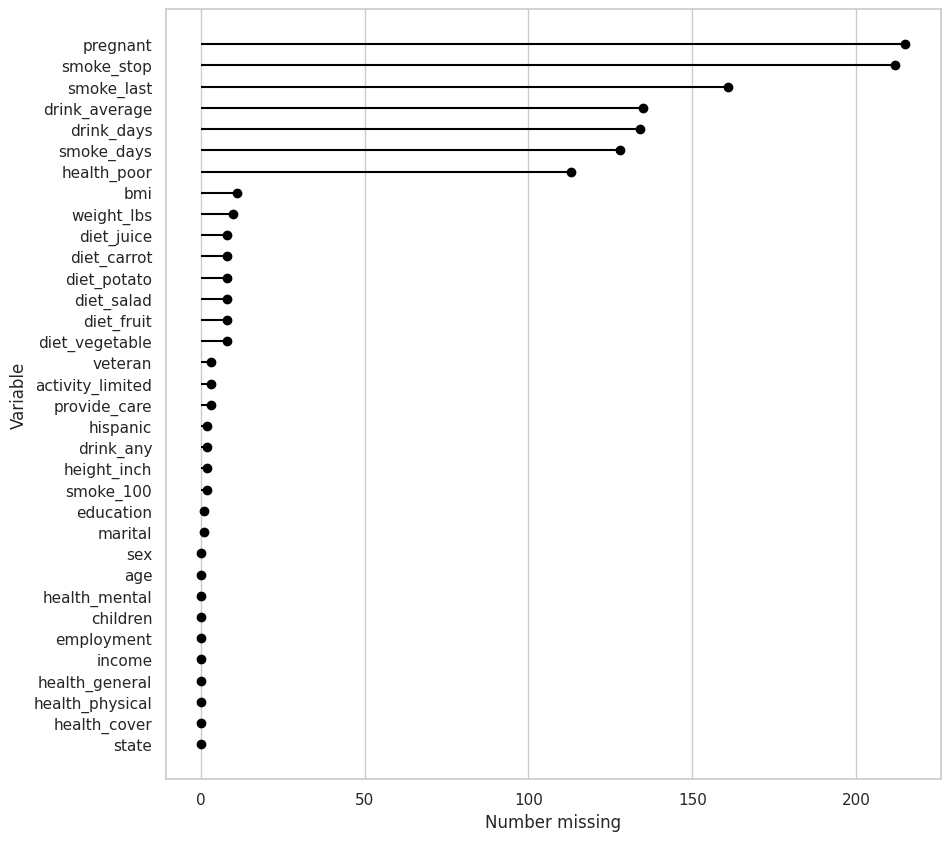

In [22]:
(
    riskfactors_df.
    missing.
    missing_variable_plot()
)

### Casos / Observaciones / Filas

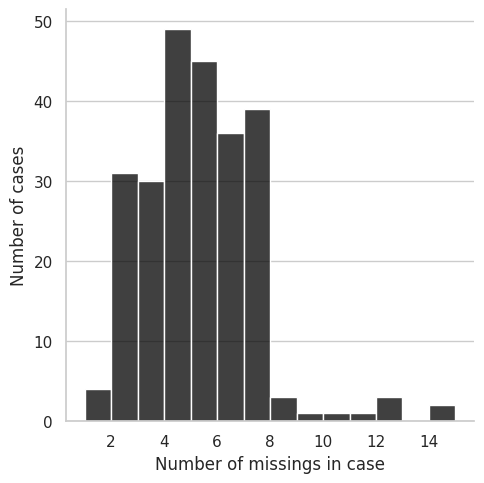

In [23]:
(
    riskfactors_df
    .missing
    .missing_case_plot()
    )

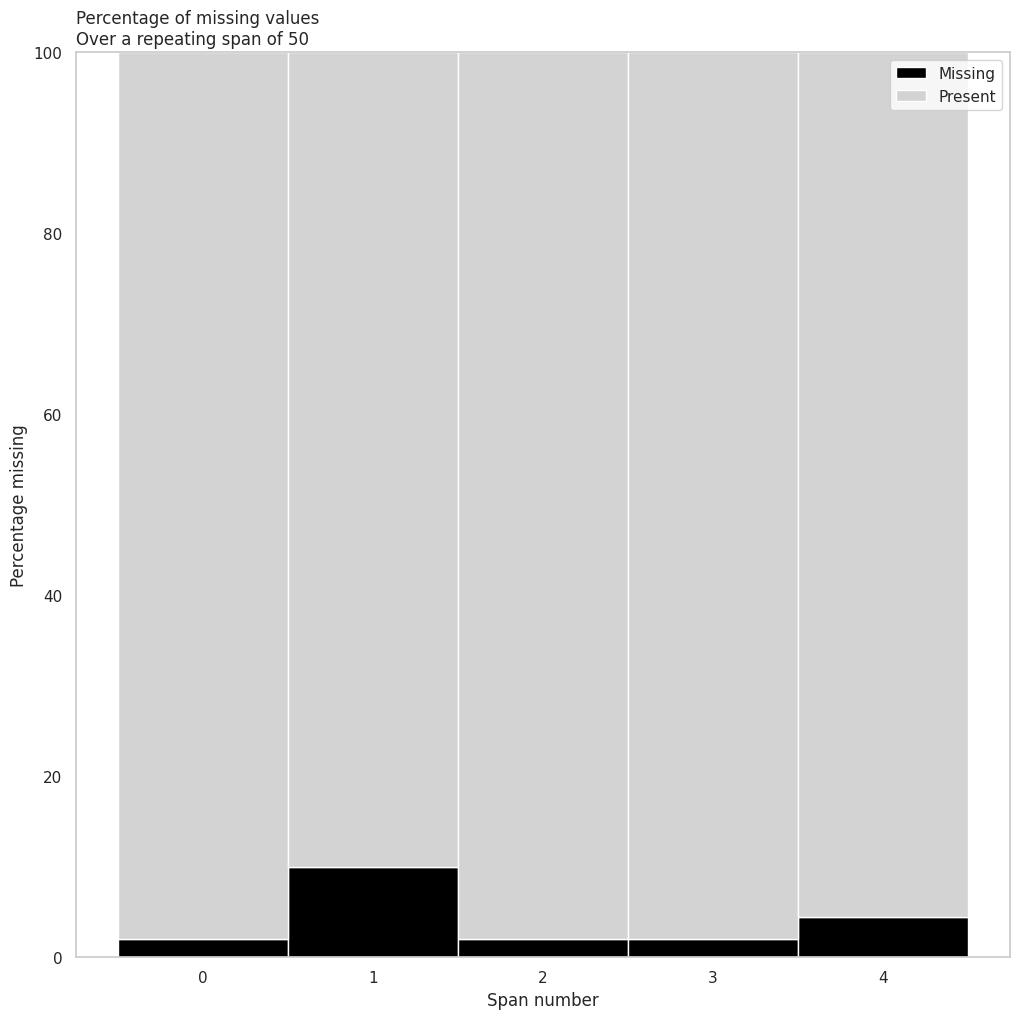

In [24]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs',
        span_every=50,
        rot=0
    ))

<Axes: >

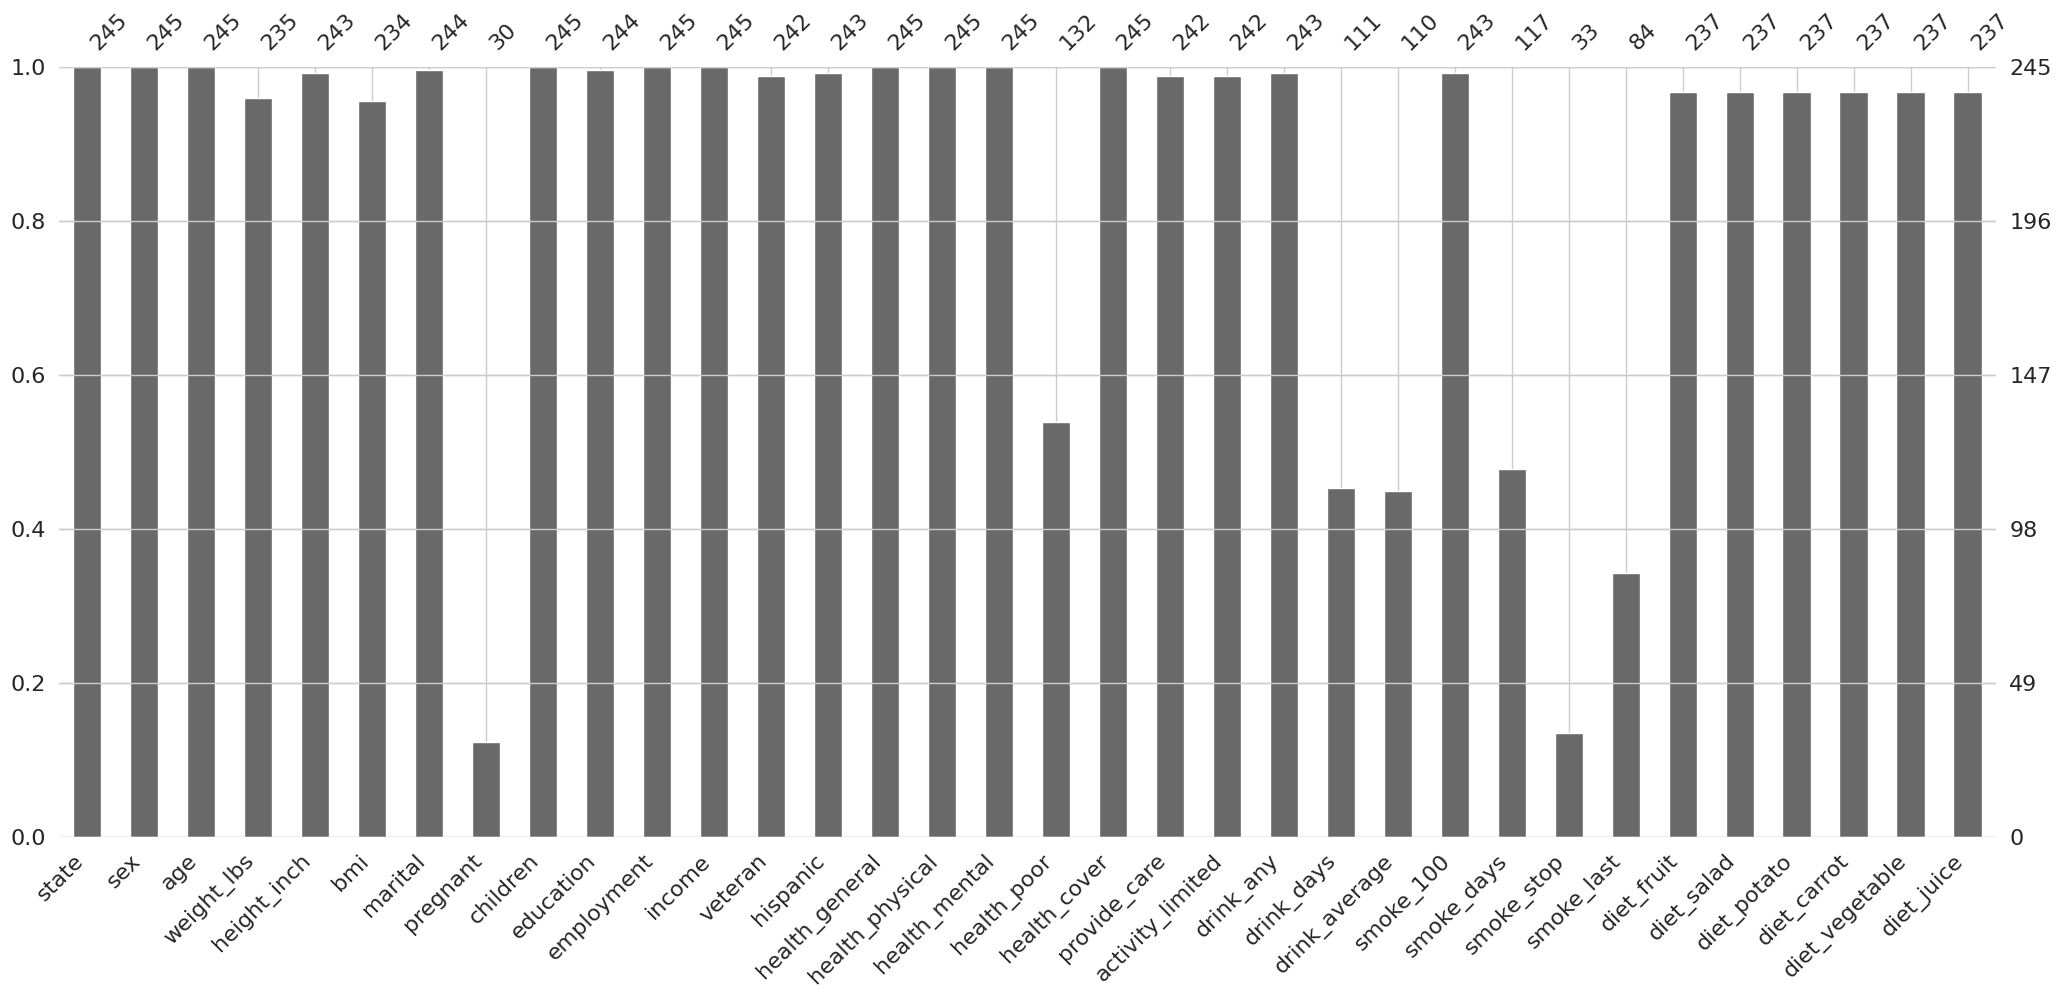

In [25]:
missingno.bar(df=riskfactors_df)

<Axes: >

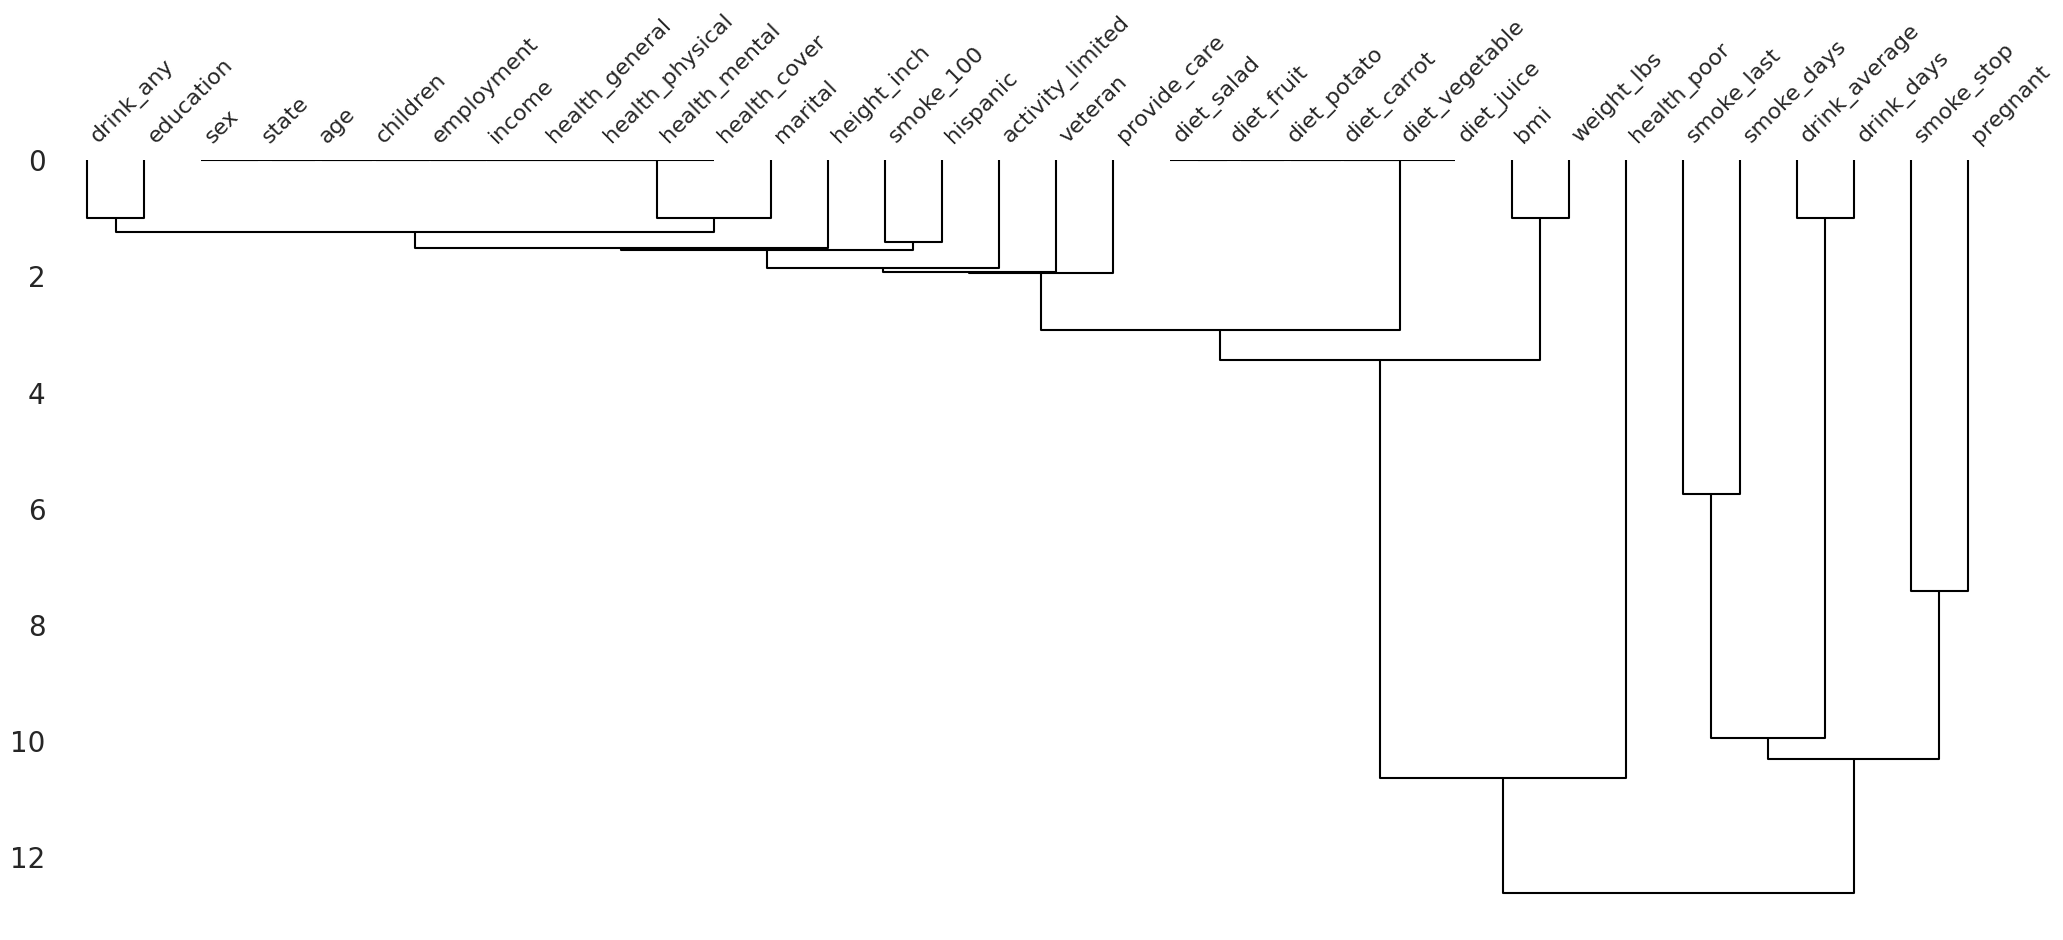

In [26]:
missingno.dendrogram(df=riskfactors_df)

<Axes: >

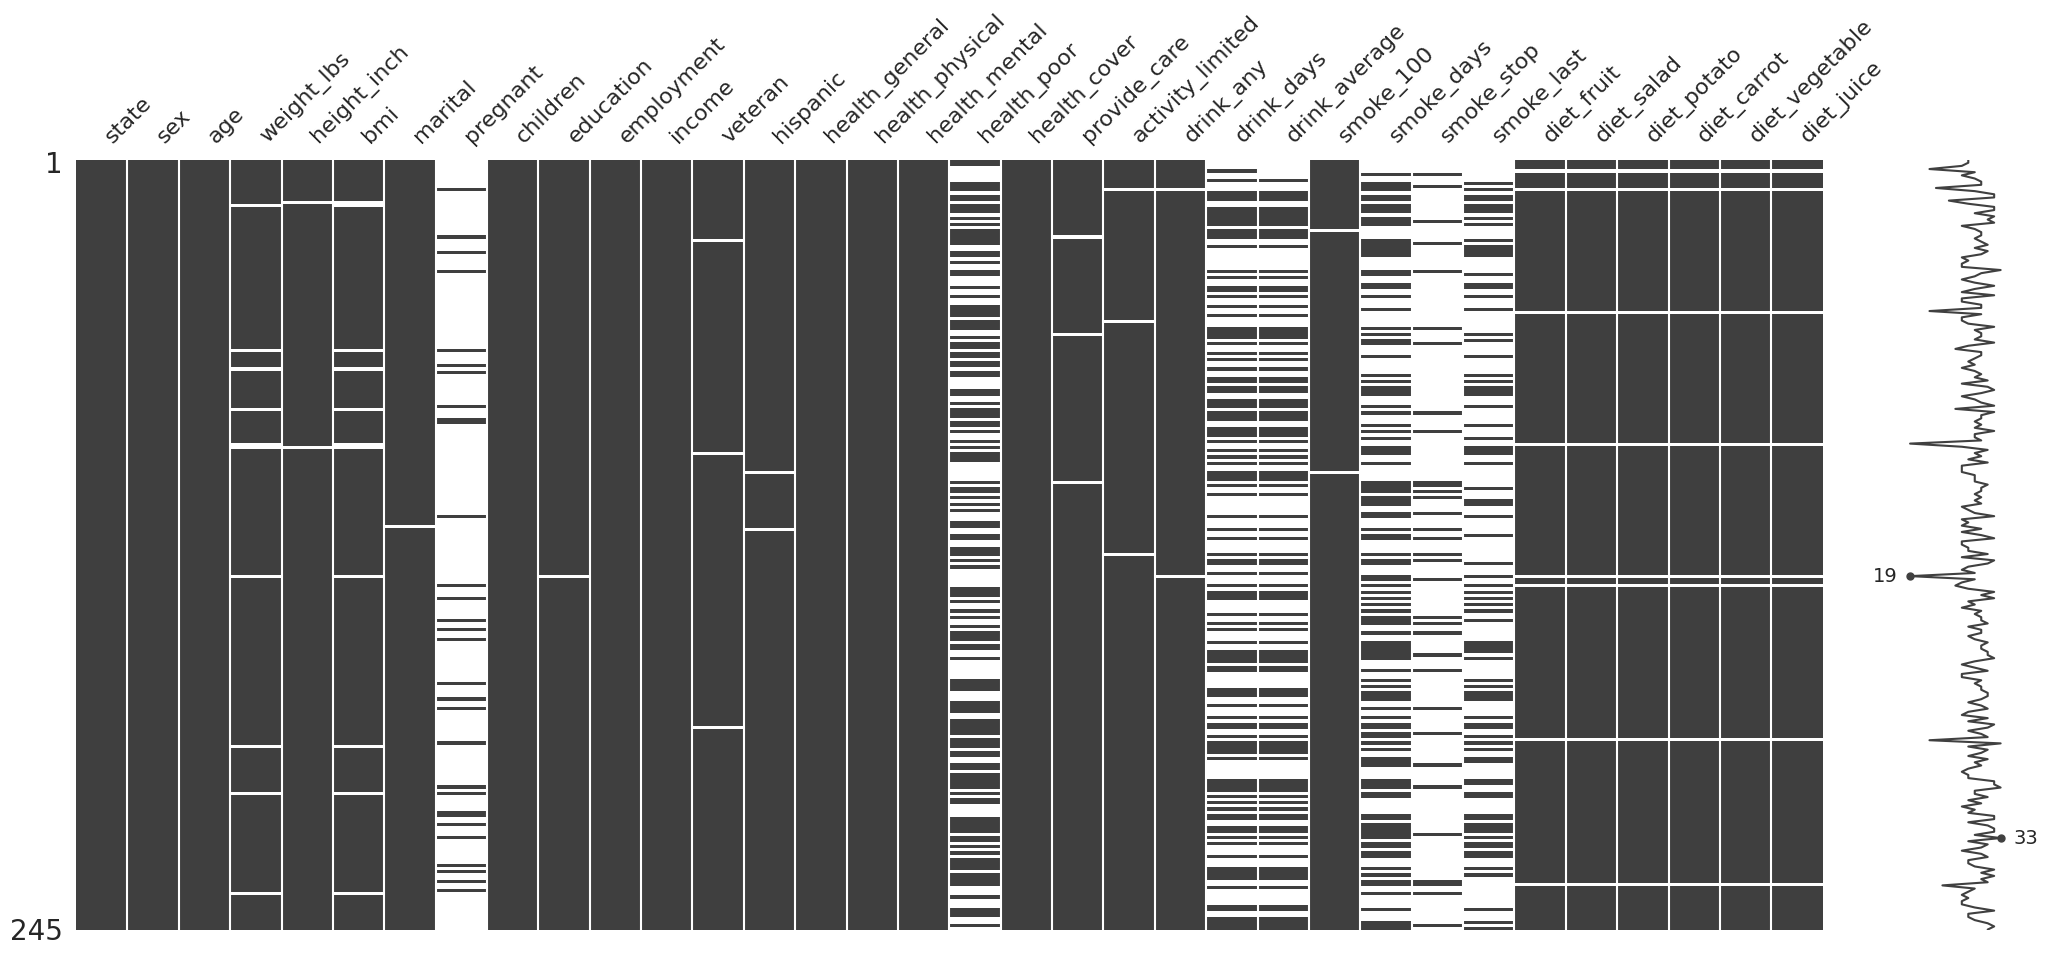

In [27]:
missingno.matrix(df=riskfactors_df)

/home/nico9779/anaconda3/envs/datos_faltantes/lib/python3.9/site-packages/upsetplot/plotting.py:700: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  r = get_renderer(fig)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

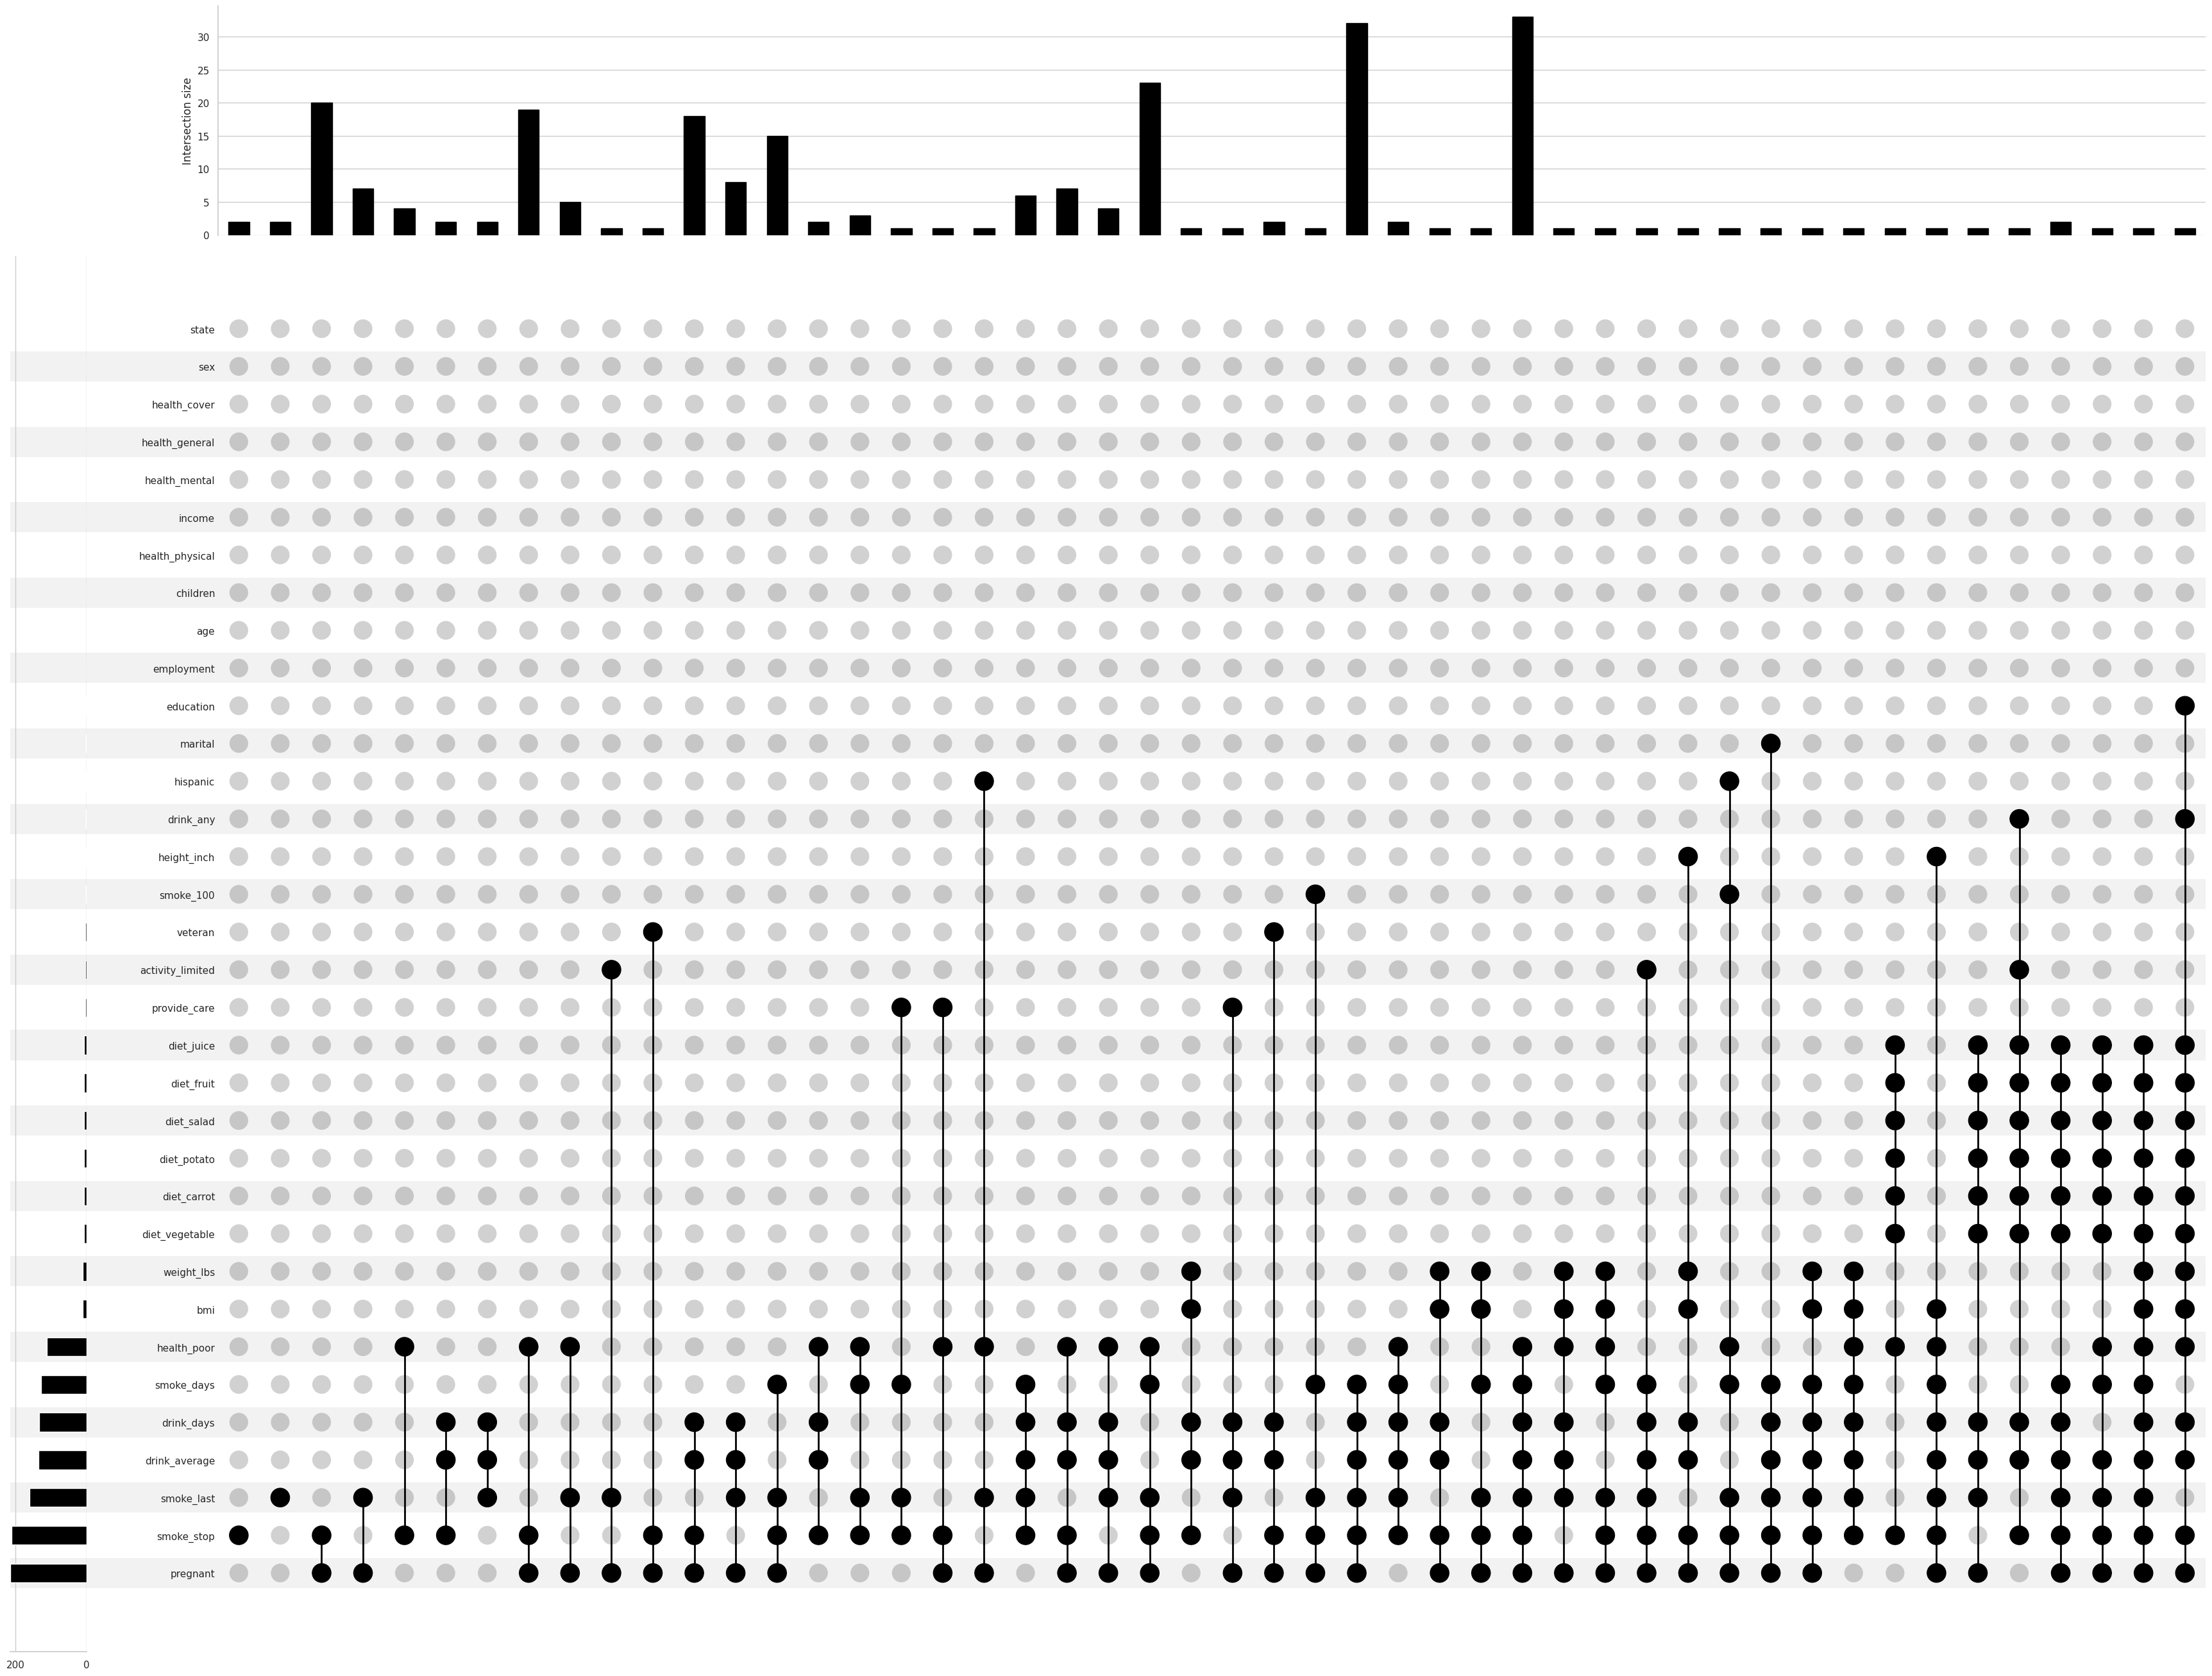

In [28]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 60,
    )
)

/home/nico9779/anaconda3/envs/datos_faltantes/lib/python3.9/site-packages/upsetplot/plotting.py:700: MatplotlibDeprecationWarning: The get_renderer function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.canvas.get_renderer() instead.
  r = get_renderer(fig)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

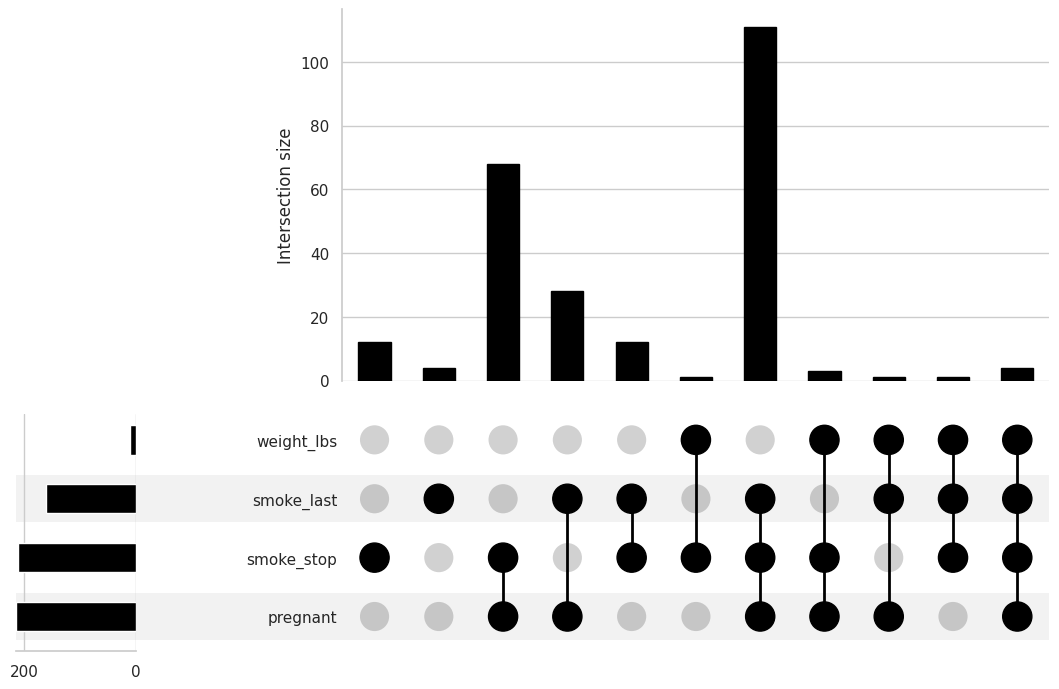

In [29]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = ['weight_lbs','pregnant','smoke_last','smoke_stop'],
        element_size = 60,
    )
)

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [30]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [31]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [32]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [33]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [34]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [35]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [36]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [37]:
pd.read_csv(
    './data/missing_data_enconding_example.csv',
    na_filter= True,
    na_values=[-99,-1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


#### Sustitución global

In [38]:
(
    missing_data_example_df
    .replace(
        to_replace= [-99,'NA'],
        value= np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [39]:
(
    missing_data_example_df
    .replace(
        to_replace= {
            'x':{
                -99:np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [40]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [41]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index= 'name',
        names_from= 'time',
        values_from= 'value'
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [42]:
(
    implicit_to_explicit_df
    .value_counts(
        subset= ['name']
    )
    .reset_index(name='n')
    .query('n < 2')

)

,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [43]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time'
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar la exposición de n-tuplas de valores faltantes

In [44]:
(
    implicit_to_explicit_df
    .complete(
        {
            'name':['lynn', 'zelda']
        },
        {
            'time':['morning','afternoon']
        },
        sort=True
    )
    
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


#### Rellenar los valores faltantes

In [45]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value=np.nan
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar el rellenado de valores faltantes implícitos

In [46]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value= 0,
        explicit=False # Con esta herramienta se pueden rrlenar también los valores marcados como faltantes pero que son explicitos
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


## Tipos de valores faltantes

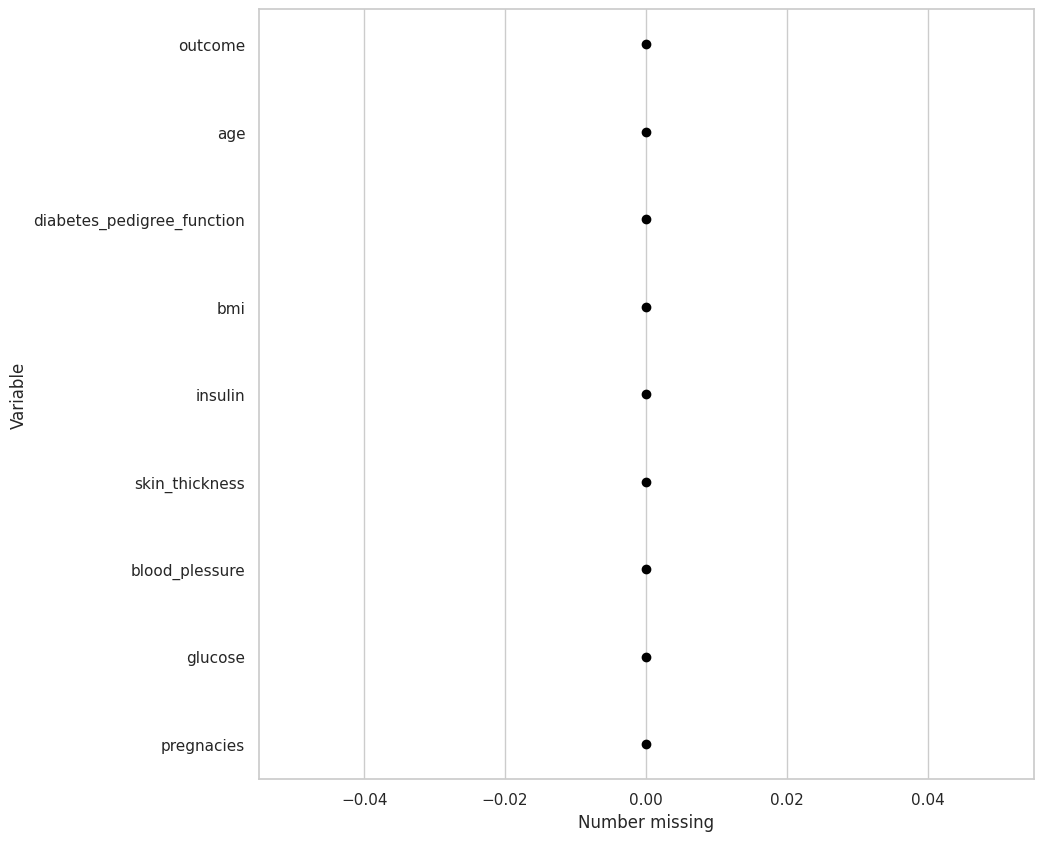

In [47]:
diabetes_df.missing.missing_variable_plot()
# Al parecer no hay valores faltantes, pero en este caso los valores faltantes son represetados por ceros

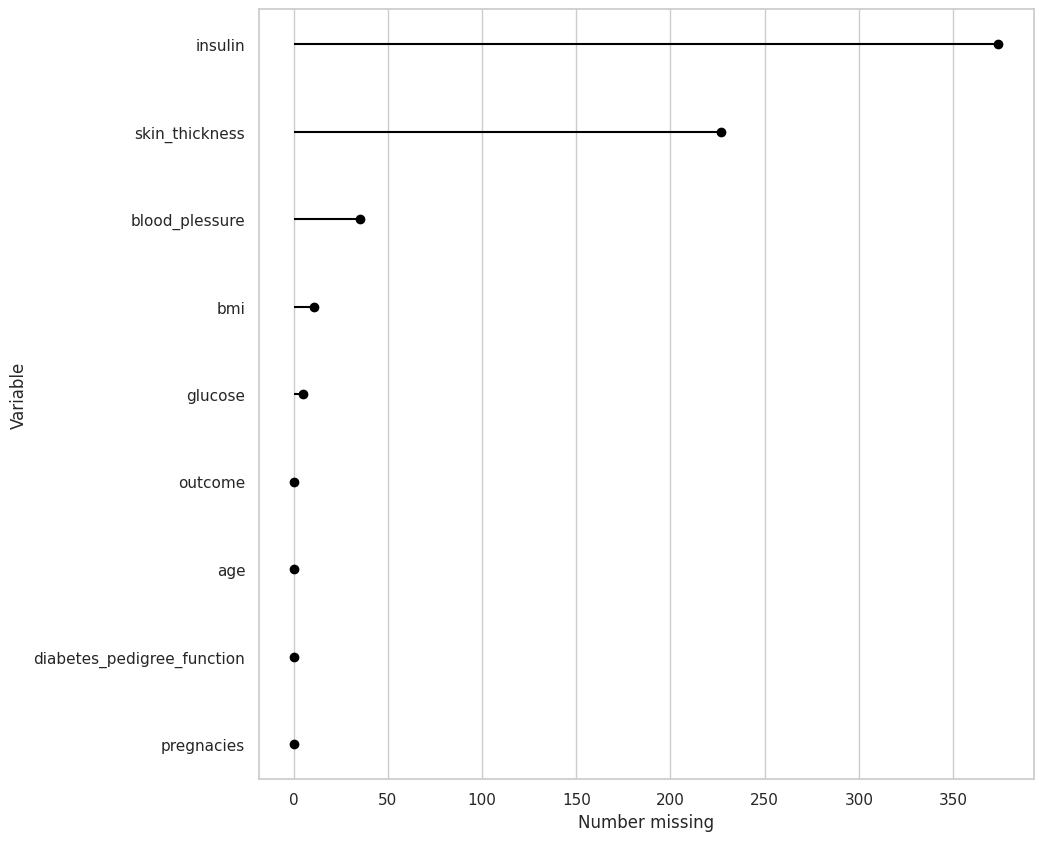

In [48]:
diabetes_df[diabetes_df.columns[1:6]]=diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()


### _Missing Completely At Random_ (MCAR)

Para los casos de las variables como bmi y glucosa se puede decir que debido a que hay tan pocos valores faltantes, que estos probablemente estos se dieron completamente al azar.

<Axes: >

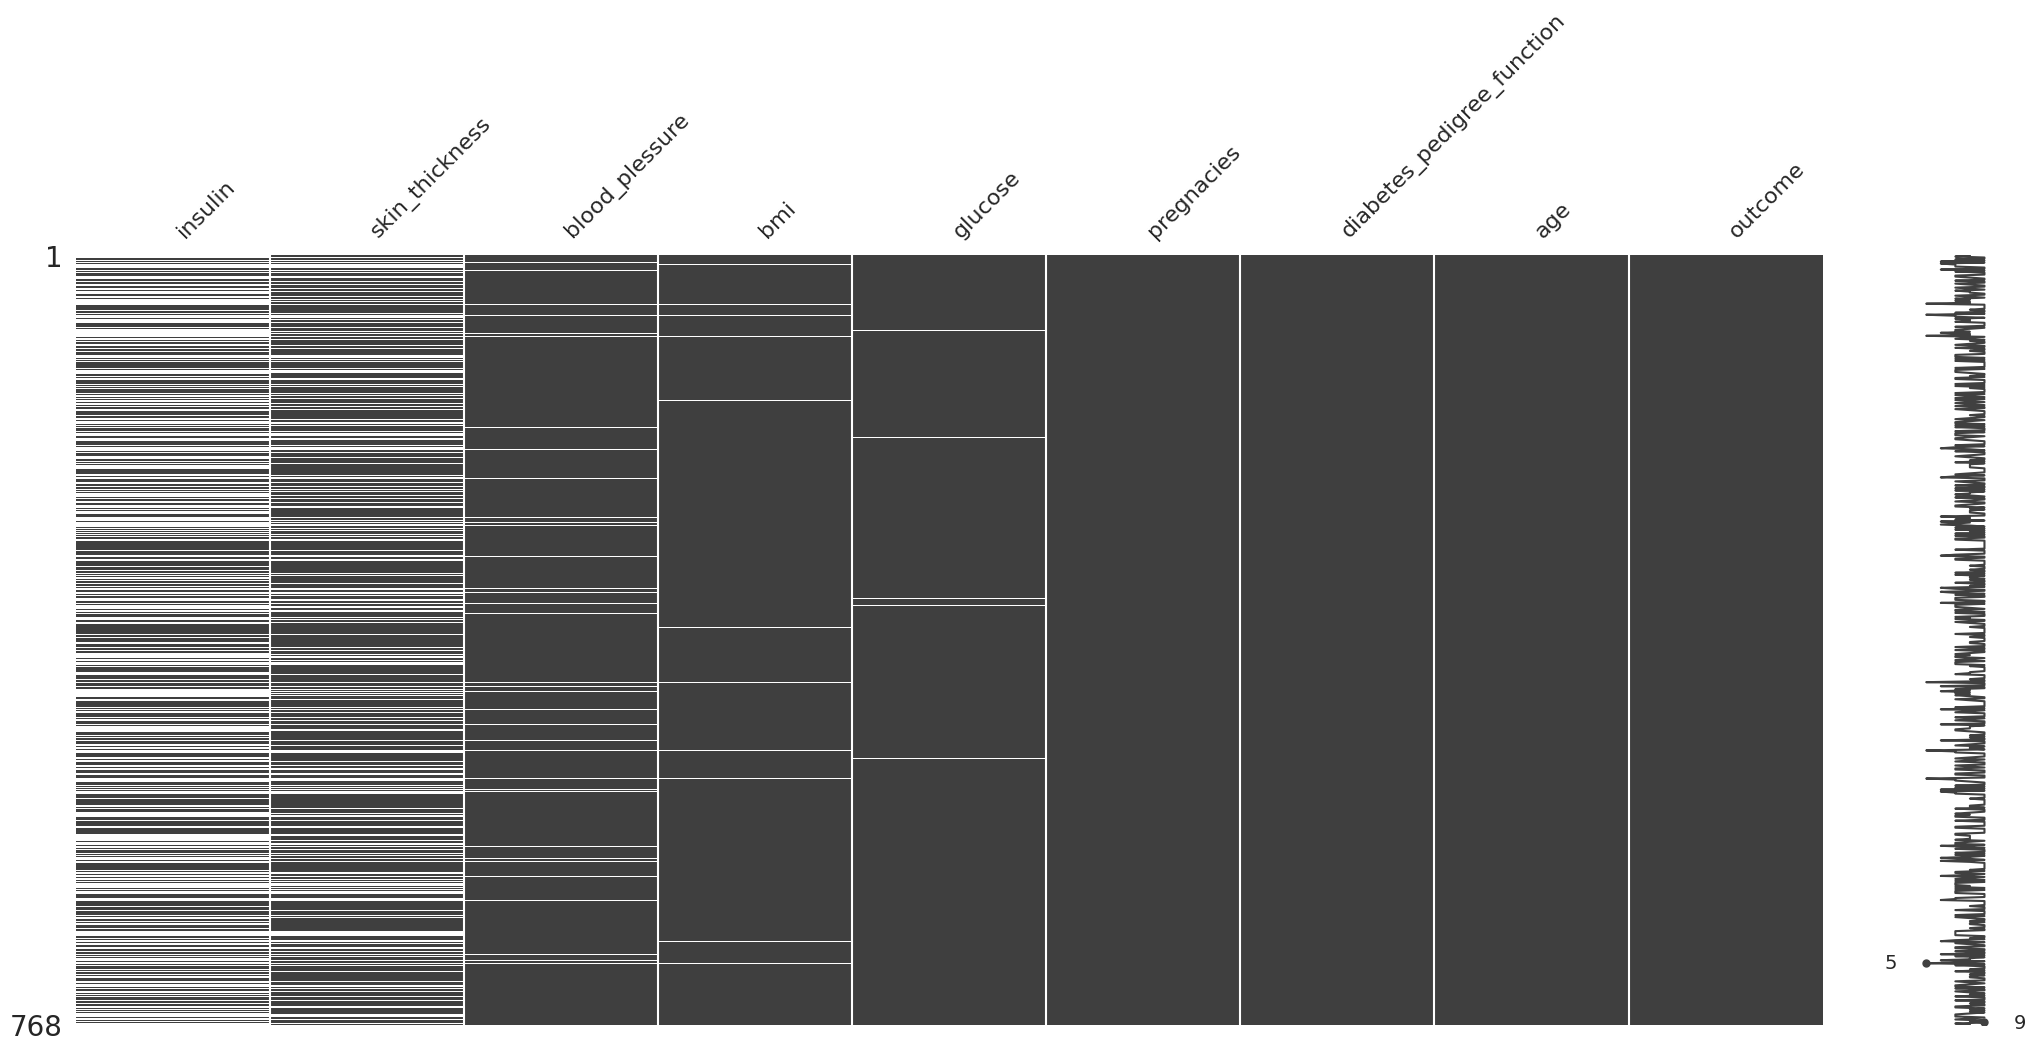

In [49]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(
        missingno.matrix
    )
)

### _Missing At Random_ (MAR)

Parece que la variable **blood_plessure** parece estar relacionada con **insuline** y **skin_tickness** ya que tienen zonas similares de valores faltantes

<Axes: >

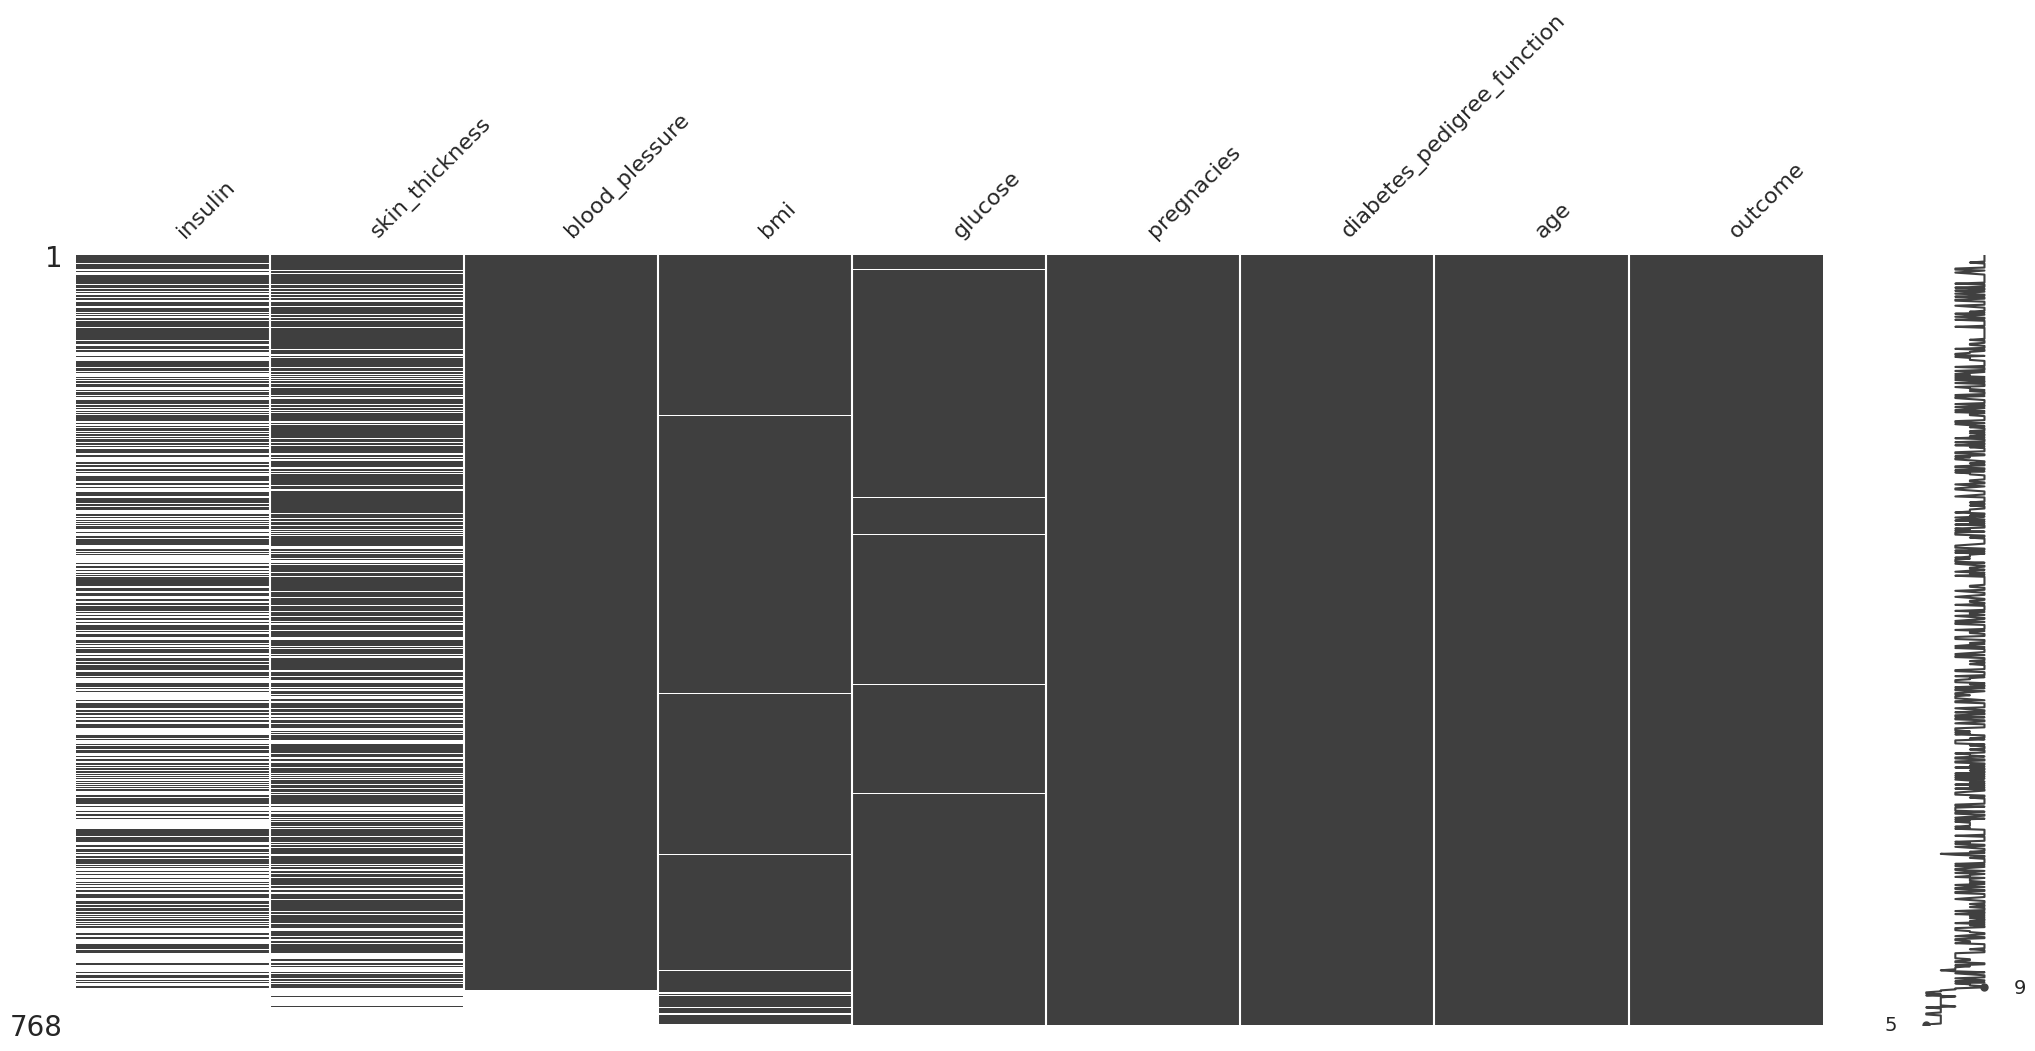

In [50]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='blood_plessure')
    .pipe(
        missingno.matrix
    )
)

### _Missing Not At Random_ (MNAR)
Se puede ovservar como en la franja donde se presentan la mayoría de los valores faltantes en la variable **insulina**, también las otras variables presentan datos faltantes, por lo cual podría ser posible que haya una relación de tipo MAR entre los datos.


<Axes: >

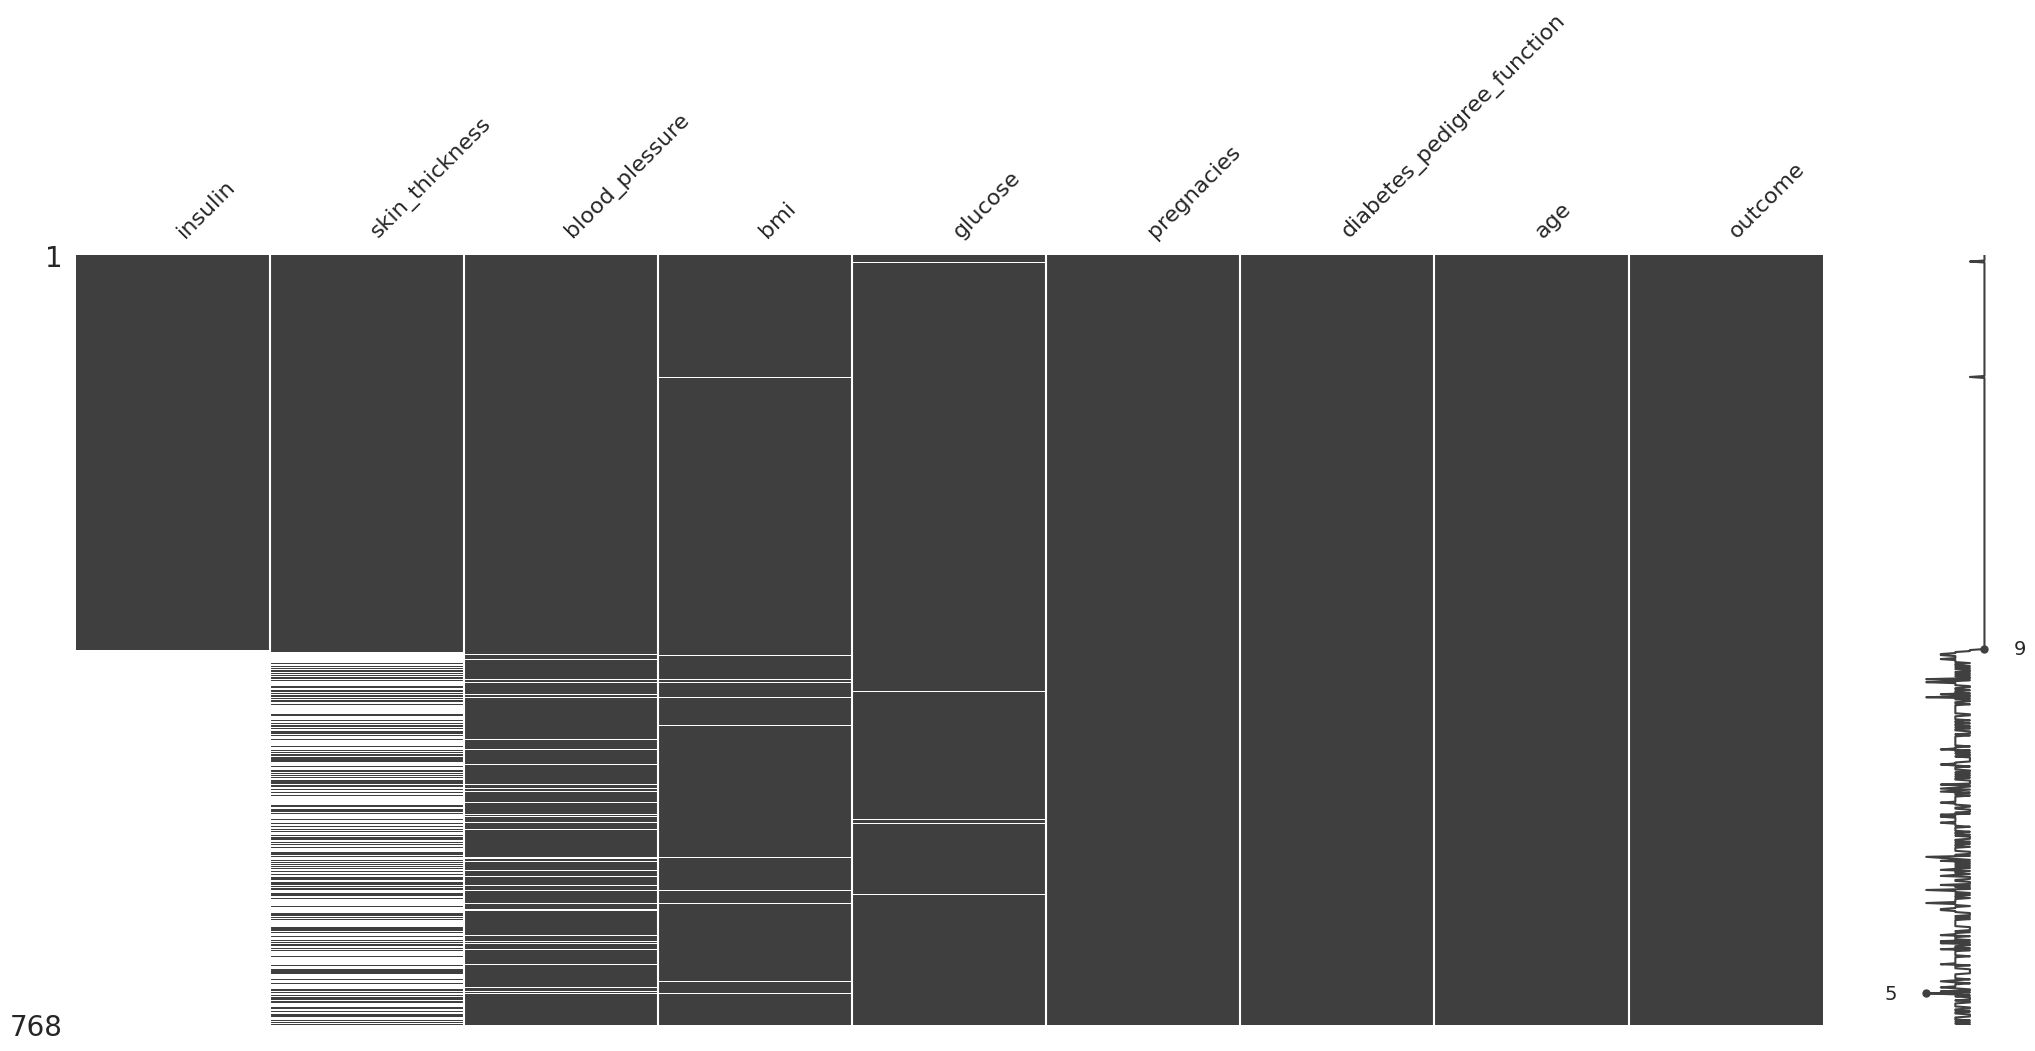

In [51]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='insulin')
    .pipe(
        missingno.matrix
    )
)

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [52]:
(
    riskfactors_df
    .isna()
    .replace({
        True: 'Missing',
        False:'No Missing'
    })
    .add_suffix('_NA')
    .pipe(
        lambda shadow_matrix:pd.concat(
            [riskfactors_df,shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6,...,No Missing,Missing,Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5,...,No Missing,Missing,Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4,...,No Missing,Missing,Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6,...,No Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5,...,No Missing,No Missing,No Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4,...,No Missing,Missing,Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4,...,No Missing,Missing,Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6,...,No Missing,No Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4,...,No Missing,No Missing,No Missing,Missing,No Missing,No Missing,No Missing,No Missing,No Missing,No Missing


### Utilizar función de utilería `bind_shadow_matrix()`

In [53]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [54]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


In [55]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(['pregnant_NA'])
    ['weight_lbs']
    .describe()
    .reset_index()
)

,pregnant_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,207.0,175.478261,45.139893,96.0,145.0,170.0,195.50,410.0
1,Not Missing,28.0,165.321429,40.946264,113.0,140.0,153.0,191.25,260.0


## Visualización de valores faltantes en una variable

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

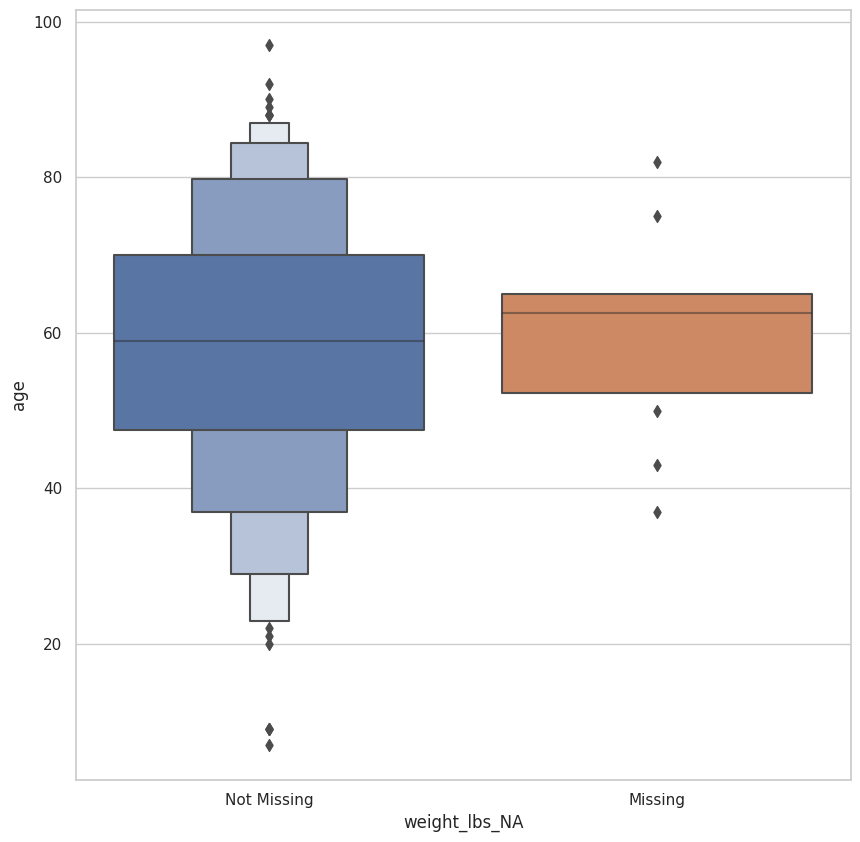

In [56]:
riskfactors_df.missing.bind_shadow_matrix().pipe(lambda df: (sns.boxenplot(data=df,x='weight_lbs_NA',y='age')))


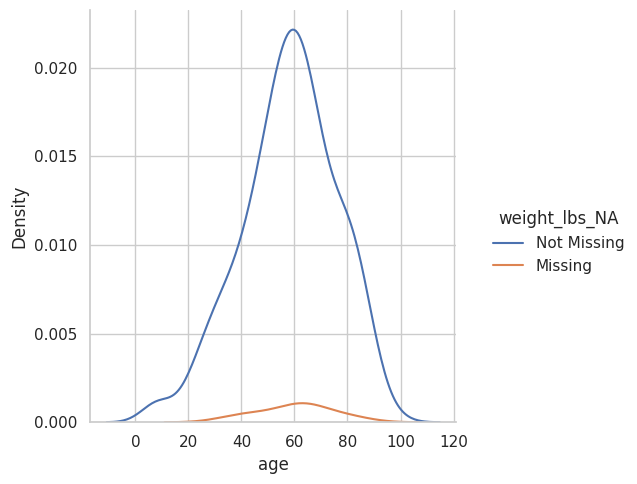

In [57]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                hue='weight_lbs_NA',
                kind='kde'
            )
        )
    )
)
plt.show()

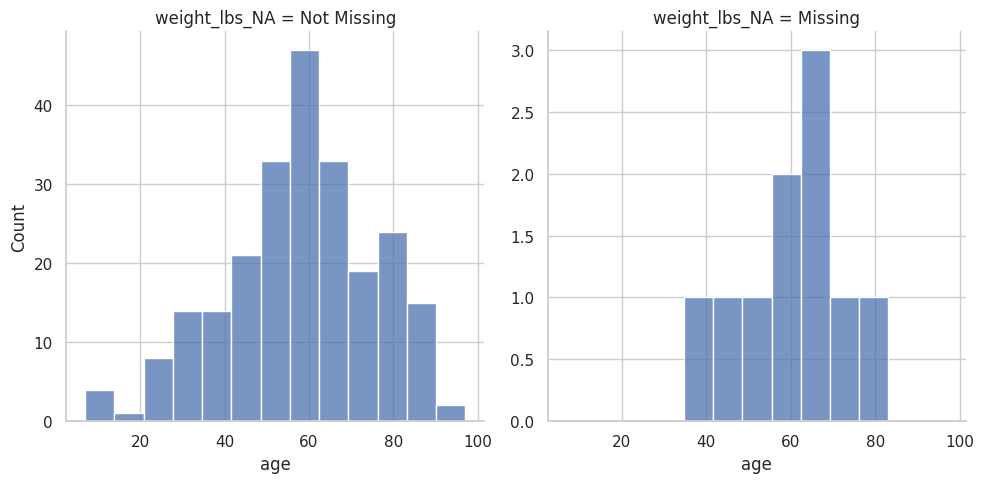

In [58]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col='weight_lbs_NA',
                facet_kws={
                    'sharey':False
                }
            
            )
        )
    )
)
plt.show()

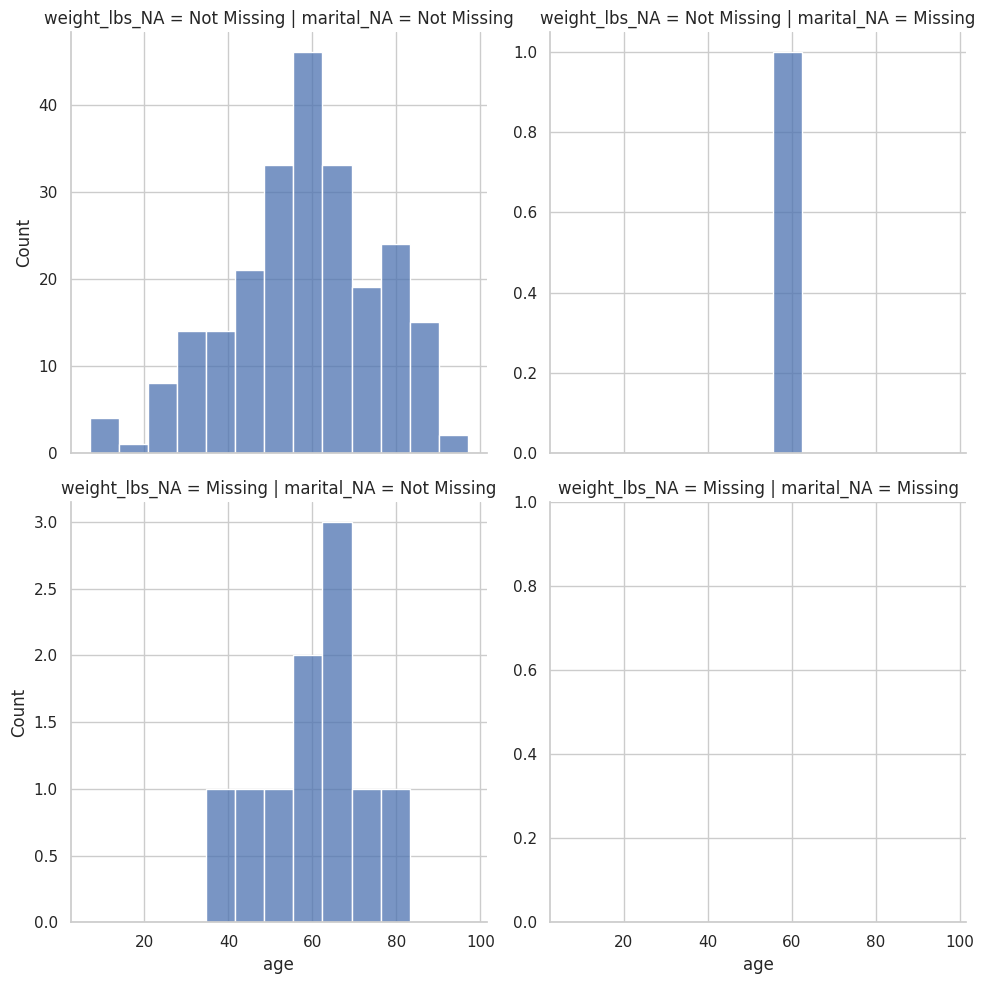

In [59]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='age',
                col='marital_NA',
                row='weight_lbs_NA',
                 facet_kws={
                    'sharey':False
                }
            
            )
        )
    )
)
plt.show()

## Visualización de valores faltantes en dos variables

### Función que añade valores aleatorios a las variables con valores faltantes

In [60]:
def column_fill_with_dummies(
    column:pd.Series,
    #proporción de los datos en la grafica
    proportion_below: float=0.10,
    #Asolapamiento de los puntos en el grafico
    jitter:float=0.075,
    # Semilla para aleatoriedad
    seed: int=42
) -> pd.Series:
    
    #Copiar las columnas del DataFrame
    column = column.copy(deep=True)
    
    #Extraer los valores de las variables
    missing_mask= column.isna() # Matriz de booleanos (True/False)
    number_missing_values= missing_mask.sum() # Conteo de valores faltantes
    column_range= column.max()-column.min() # Rango de las variables
    
    # Shift data - cambiar datos
    column_shift= column.min()-column.min()*proportion_below
    
    # Creación ruido aleatorio
    np.random.seed(seed) # Inicio aleatorio
    column_jitter= (np.random.rand(number_missing_values)-2)*column_range*jitter # Columna con valores con ruido incluido
    
    # Guardar new dummy_data
    column[missing_mask] = column_shift + column_jitter
    
    return column
    

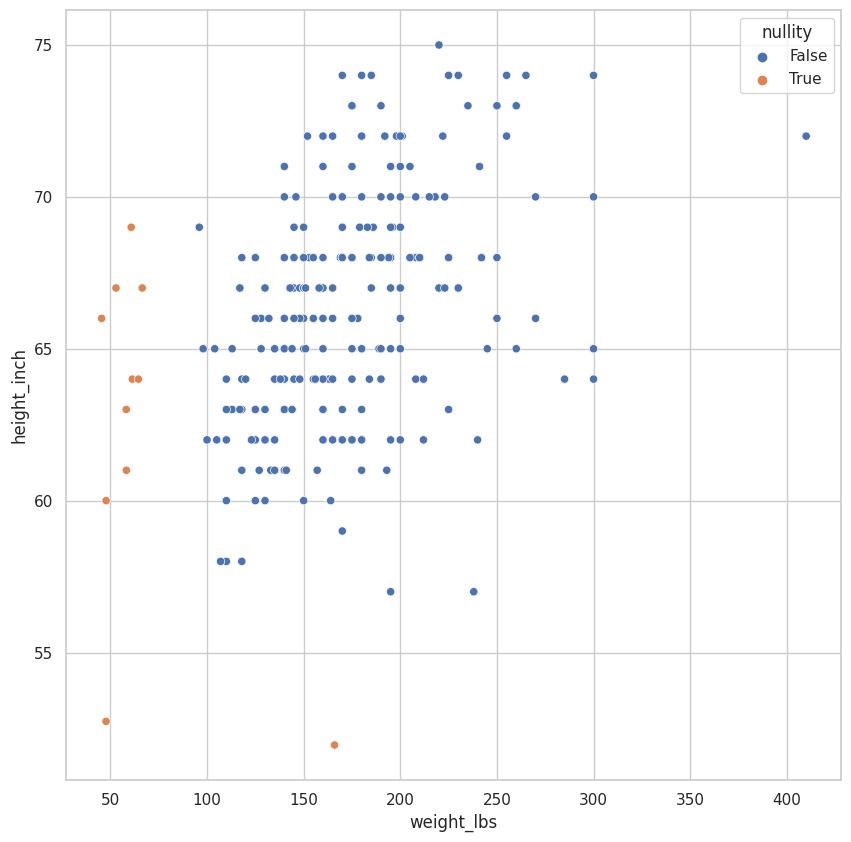

In [61]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_dtypes(
        exclude="category"
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)
plt.show()

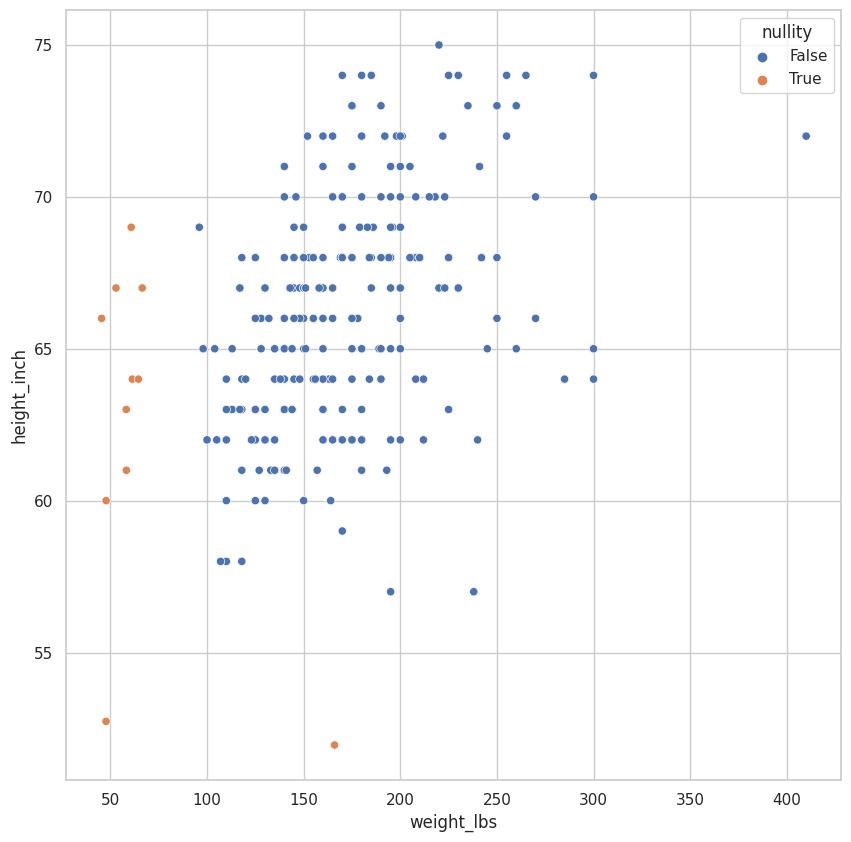

In [64]:
riskfactors_df.missing.scatter_plot_with_dummies(
    x_NA= 'weight_lbs_NA',
    y_NA= 'height_inch_NA',
    x='weight_lbs',
    y='height_inch'
)
plt.show()

## Correlación de nulidad

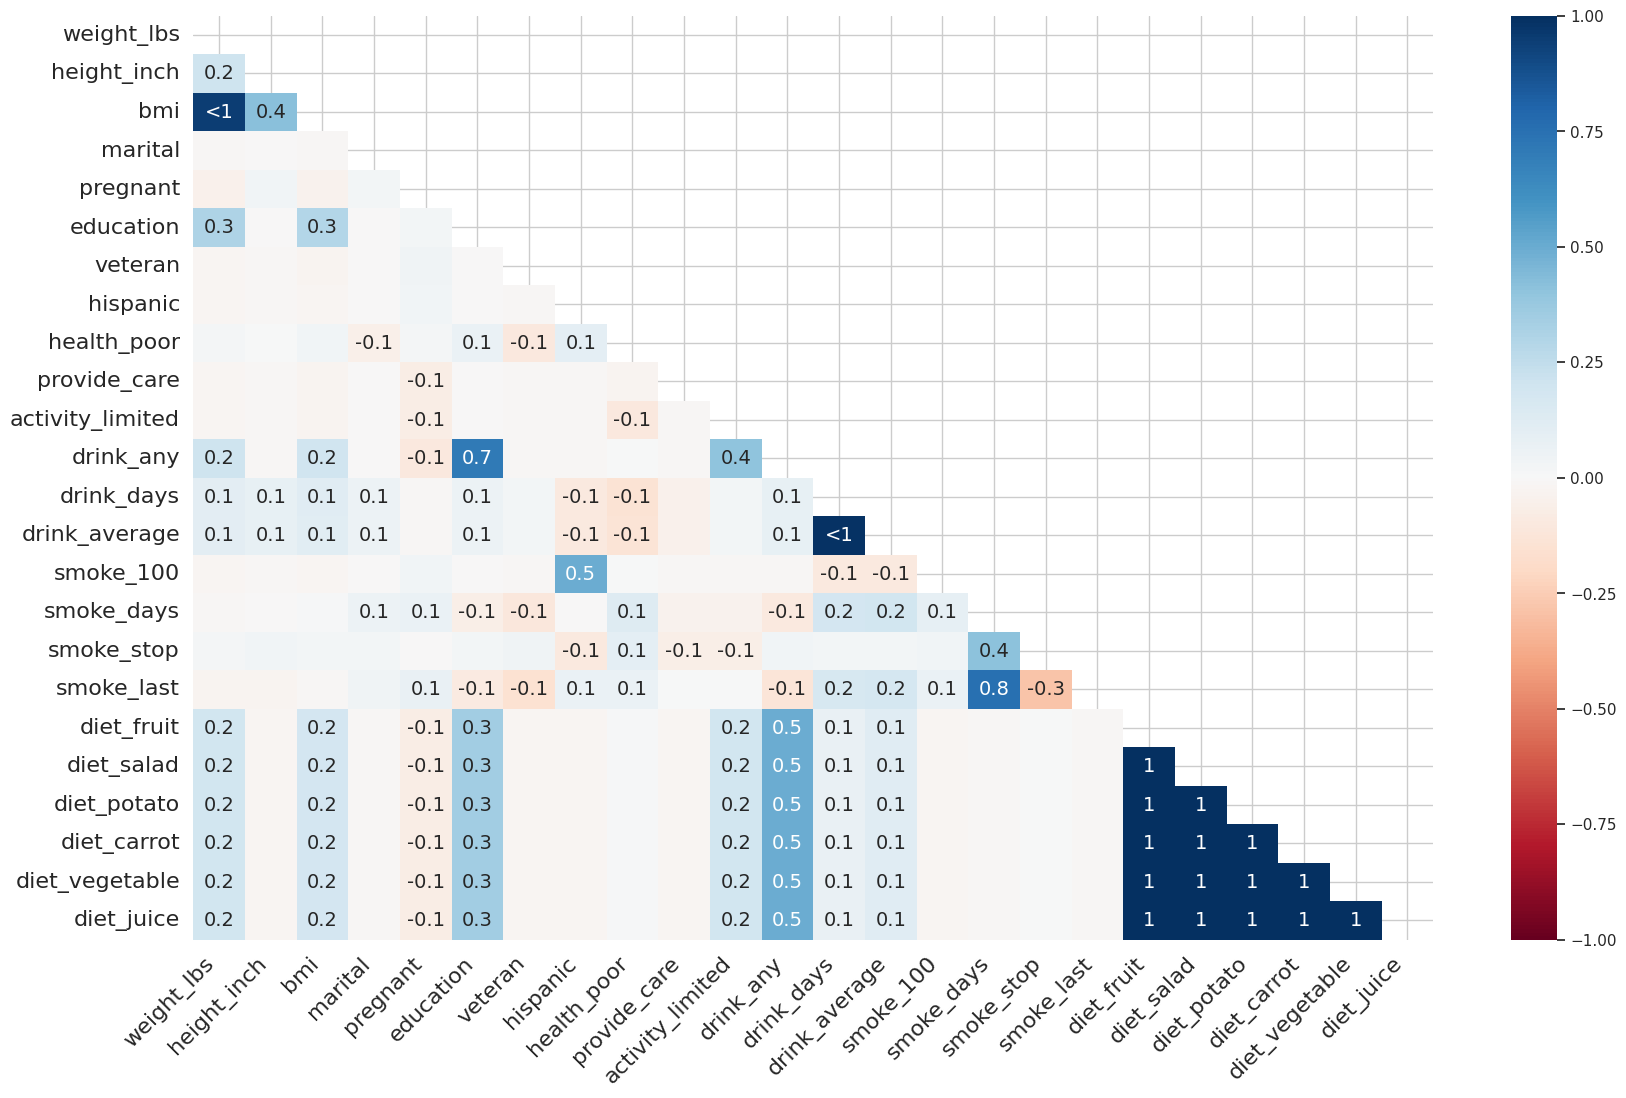

In [66]:
missingno.heatmap(
    df = riskfactors_df
)
plt.show()

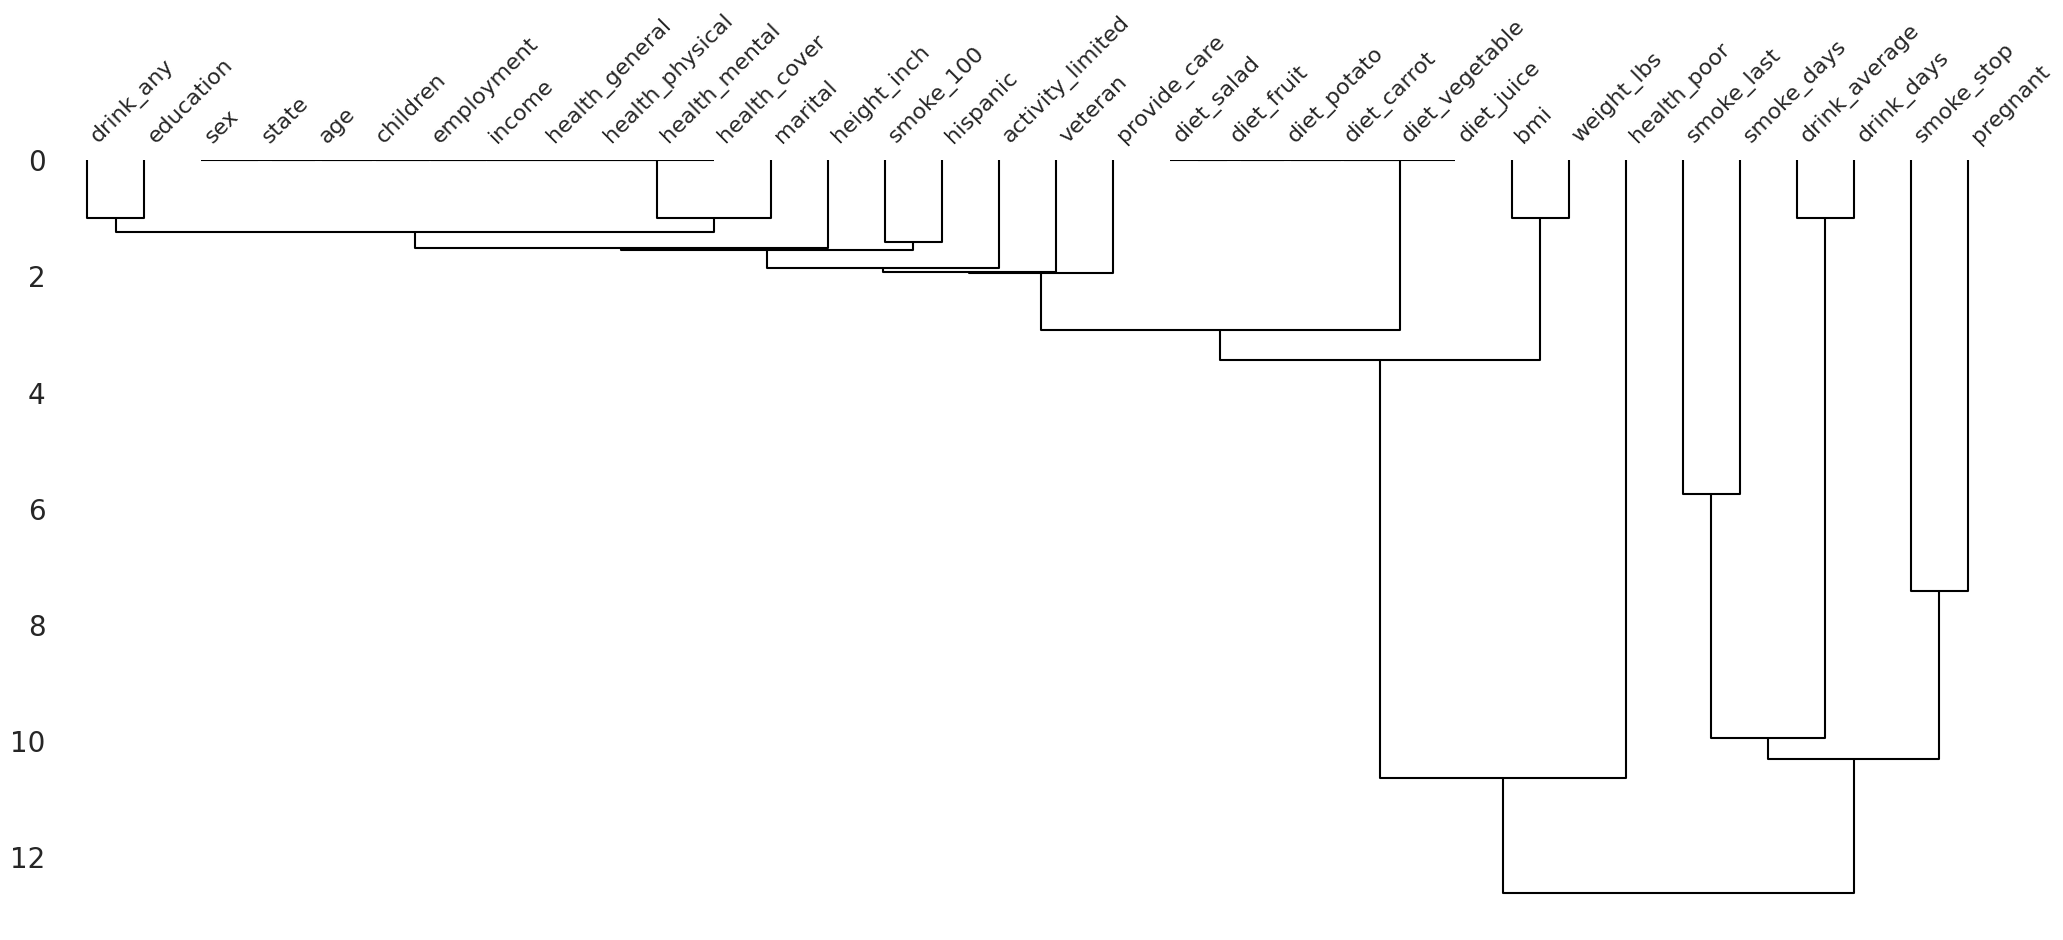

In [68]:
missingno.dendrogram(
    df=riskfactors_df
)
plt.show()

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [71]:
(
    riskfactors_df
    .shape
)

(245, 34)

### _Pairwise deletion_ (eliminación por pares)

In [75]:
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

Los valores cambian  cuando se realizan operaciones matematicas en Pandas, ya que este por defecto no opera los valores faltantes, para ´poder realizar esto, se debe activar el parámetro **(skipna =False)**

In [80]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count() 

(245, 235)

In [87]:
(
    riskfactors_df
    .mean(numeric_only=True)
)

age                 58.106122
weight_lbs         174.268085
height_inch         66.345679
bmi                 27.784573
children             0.424490
health_physical      4.118367
health_mental        3.142857
dtype: float64

In [86]:
(
    riskfactors_df
    .mean(numeric_only=True,skipna=False)
)

age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children            0.424490
health_physical     4.118367
health_mental       3.142857
dtype: float64

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

Para ello se utiliza la función de Pandas **dropna**, la cual posee los siguientes parámetros:
- subset: esta es la variable seleccionada a eliminar sus valores faltantes
- how: este es el método de eliminación, puede ser _'any'_, donde elimina todos las filas con valores faltantes o _'all'_ donde elimina las filas que tengan todos sus campos con valores faltantes

In [91]:
(
    riskfactors_df
    .dropna(
        subset='weight_lbs', 
        how= 'any'  
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


#### Con base en 2 o más columnas

In [93]:
(
    riskfactors_df
    .dropna(
        subset= ['weight_lbs','height_inch'],
        how='any'
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


In [94]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs','height_inch'],
        how='all'
    )
    
    )

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


### Representación gráfica tras la eliminación de los valores faltantes

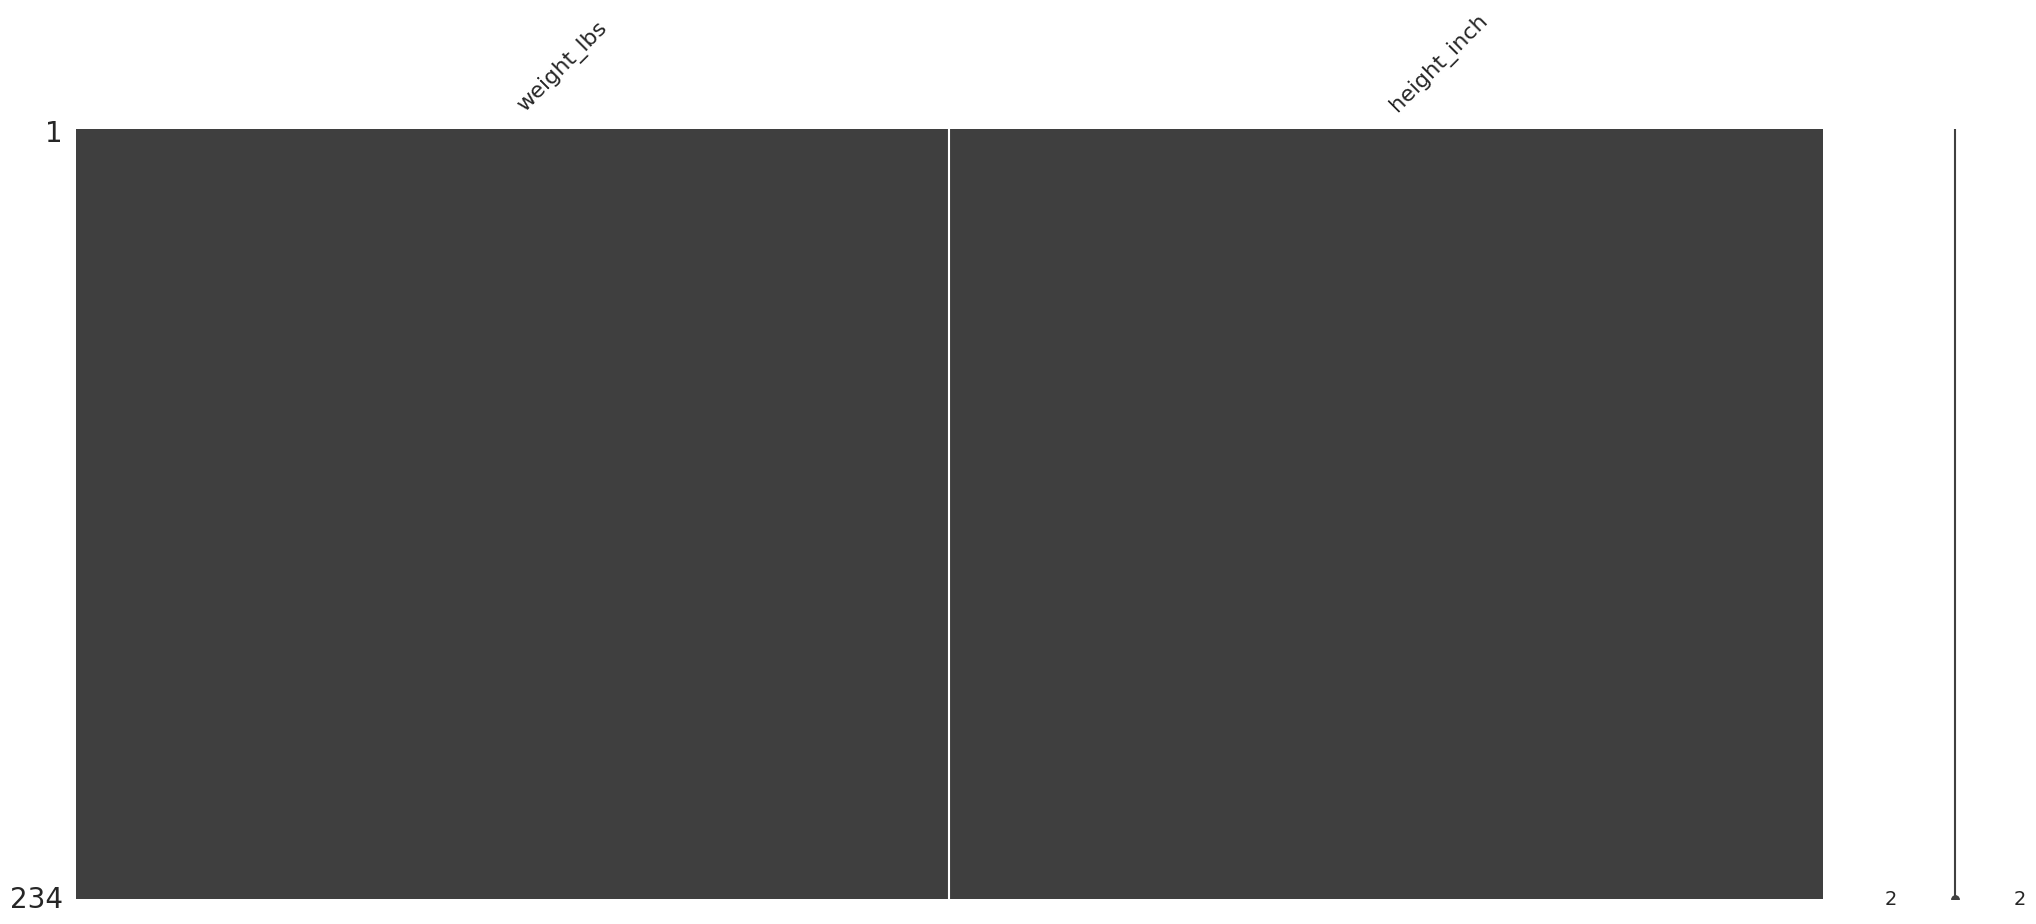

In [99]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs','height_inch'],
        how='any'
    )
    .select_columns(['weight_lbs','height_inch'])
    .pipe(missingno.matrix)
    )
    
plt.show()
    

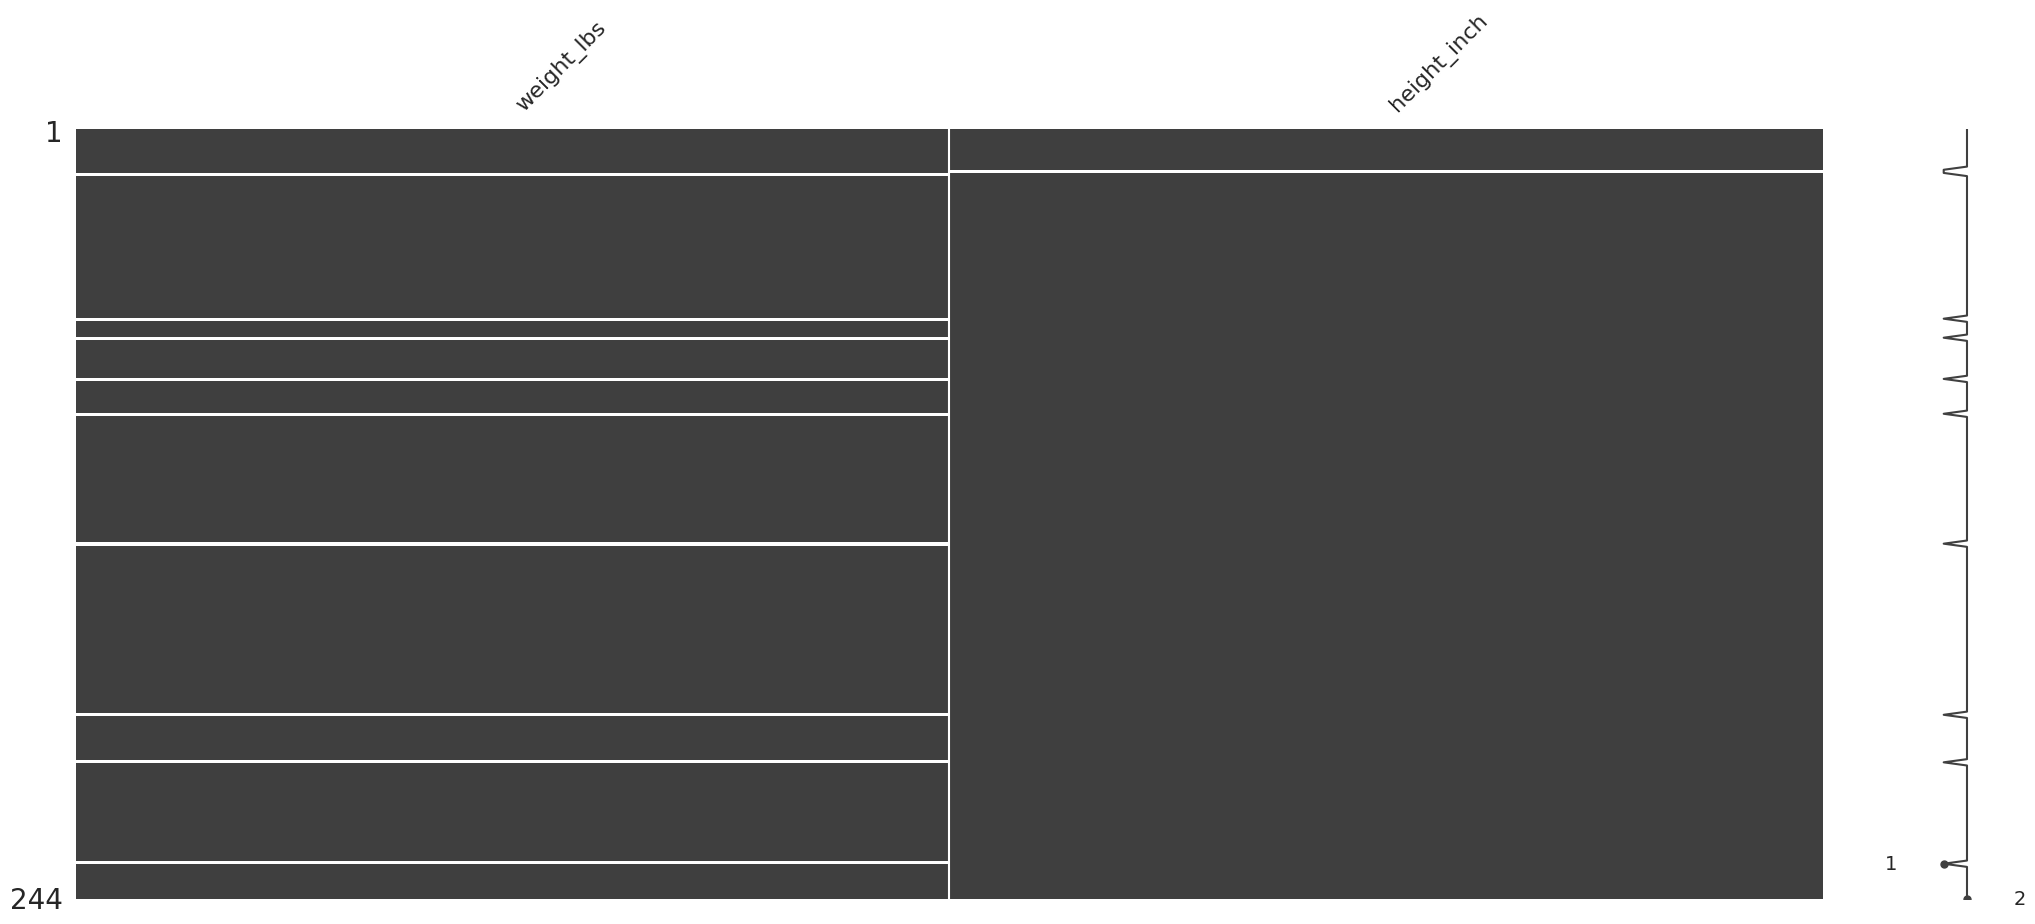

In [101]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs','height_inch'],
        how='all'
    )
    .select_columns(['weight_lbs','height_inch'])
    .pipe(missingno.matrix)
)
plt.show()

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [103]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [104]:
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


### Imputación de un único valor

In [110]:
(
    riskfactors_df
    .select_columns(['weight_lbs','height_inch','bmi'])
    .missing
    .bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis='rows',
        func= lambda column:column.fillna(column.mean()) if '_NA' not in column.name else column.name
    )
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,weight_lbs_NA,height_inch_NA,bmi_NA
1,170.0,68.0,25.90,weight_lbs_NA,height_inch_NA,bmi_NA
2,163.0,64.0,28.04,weight_lbs_NA,height_inch_NA,bmi_NA
3,230.0,74.0,29.59,weight_lbs_NA,height_inch_NA,bmi_NA
4,135.0,62.0,24.74,weight_lbs_NA,height_inch_NA,bmi_NA
...,...,...,...,...,...,...
240,144.0,63.0,25.56,weight_lbs_NA,height_inch_NA,bmi_NA
241,170.0,74.0,21.87,weight_lbs_NA,height_inch_NA,bmi_NA
242,175.0,71.0,24.46,weight_lbs_NA,height_inch_NA,bmi_NA
243,138.0,64.0,23.74,weight_lbs_NA,height_inch_NA,bmi_NA


<Figure size 1000x1000 with 0 Axes>

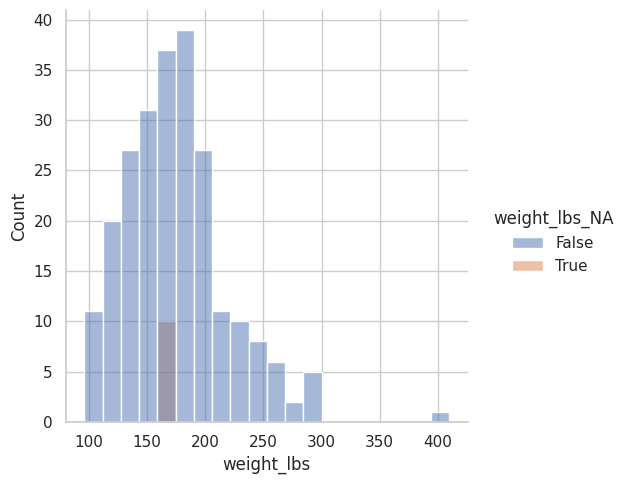

In [120]:
plt.figure(figsize=(10, 10))
(
    riskfactors_df
    .select_columns(['weight_lbs','height_inch','bmi'])
    .missing
    .bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis='rows',
        func= lambda column:column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='weight_lbs',
                hue='weight_lbs_NA'
            )
        )
    )
)
plt.show()

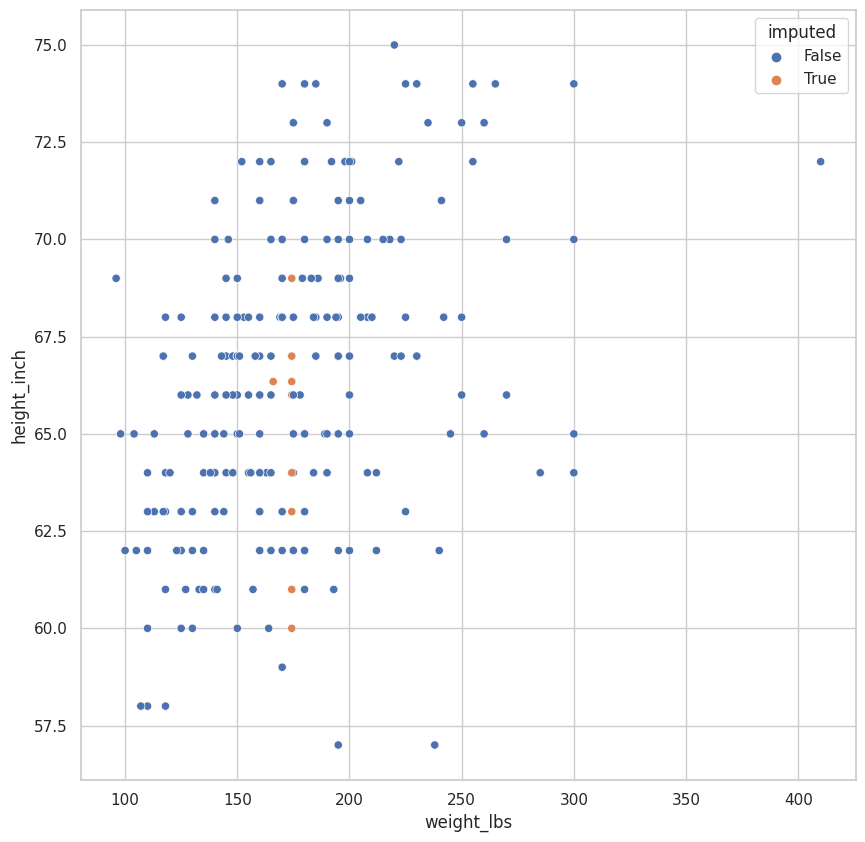

In [124]:
plt.figure(figsize=(10, 10))
(
    riskfactors_df
    .select_columns(['weight_lbs','height_inch','bmi'])
    .missing
    .bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis='rows',
        func= lambda column:column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    . assign(
        imputed = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df:(
            sns.scatterplot(
                data=df,
                x='weight_lbs',
                y='height_inch',
                hue = 'imputed'
            )
        )
    )
)
plt.show()

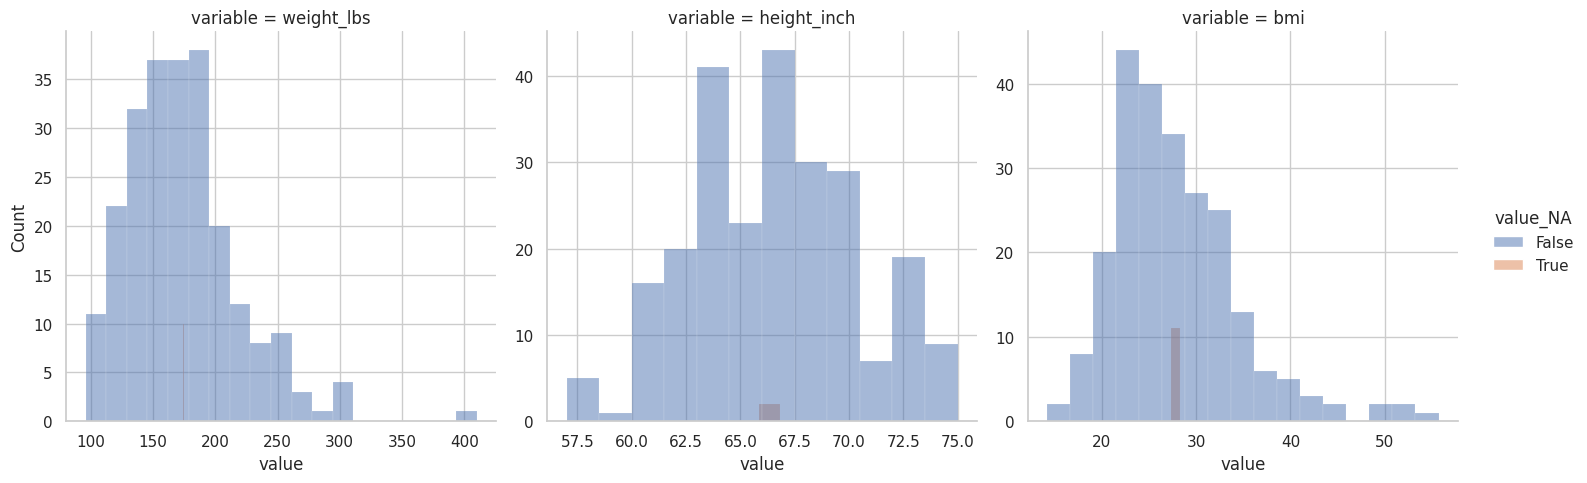

In [145]:
(
    riskfactors_df
    .select_columns(['weight_lbs','height_inch','bmi'])
    .missing
    .bind_shadow_matrix(true_string=True,false_string=False)
    .apply(
        axis='rows',
        func= lambda column:column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pivot_longer(
        index='*_NA'
    )
    .pivot_longer(
        index=['variable','value'],
        names_to='variable_NA',
        values_to='value_NA'
    )
    .assign(
        valid= lambda df:
            df.apply(axis='columns',func=lambda column:column.variable in column.variable_NA)
    )
    .query('valid')
    .pipe(
           lambda df:(
             sns.displot(
                 data=df,
                 x='value',
                 hue='value_NA',
                 col='variable',
                 common_bins=False,
                 facet_kws={
                     'sharex':False,
                     'sharey':False,
                 }
             )
          )
    )
  
)
plt.show()

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [69]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>